In [ ]:
#word n-grams
#chetana
#unigram====c h e t...
#bigram===>ch he et
#trigram==>che eta...

#sentence n-grams
#my name is chetana
#unigram====my name
#bigram===>my name, name is,
#trigram==>my name is, is name chetana

                                                                                                                                                      

Library===>pandas,numpy,mt,sns,scikit-learn
NLTK(natural lang toolit),spacy
stopwords=[]

i dont like movei
i do not like movie

# Product Review Analysis

In [1]:
#pip install nltk : bydefault
#2lac reviews : +ve,+ve review,neutral

In [1]:
import nltk
nltk.__version__

'3.8.1'

In [3]:
# initial preprocessing ....first we have to do initial preprocessing bcoz we have data here with diff diff language
#revive langauge detect
#transalte in english

## Importing Libraries

In [2]:
# !pip install googletrans==4.0.0-rc1

In [5]:
#pip install langdetect

In [3]:
#pip install httpcore
# !pip uninstall httpcore==0.15.0
# httpcore is a small and low-level library that helps handle HTTP requests and responses.
#httpx pymongo googletrans

In [4]:
import pandas as pd 
from langdetect import detect #langauge detection
#pip install langdetect
## It supports around 55 languages
##it will give predictions in codes
from googletrans import Translator 
# pip install googletrans==3.1.0a0
# import seaborn as sns
# import matplotlib.pyplot as plt

- langdetect library : langdetect is a Python library used for language detection. It can automatically detect the language of a given text or document..it supports arround 55 languages..it has code for every language.

- googletrans:
  googletrans is a Python library that provides a simple interface to Google Translate API for performing language translation. It       allows you to translate text from one language to another using Google Translate.

## Loading dataset

In [5]:
data = pd.read_csv(r"Product_Review_data.csv")
data.head(5)

review_id          product_id          reviewer_id  stars  \
0  es_0491108  product_es_0296024  reviewer_es_0999081      1   
1  es_0869872  product_es_0922286  reviewer_es_0216771      1   
2  es_0811721  product_es_0474543  reviewer_es_0929213      1   
3  es_0359921  product_es_0656090  reviewer_es_0224702      1   
4  es_0068940  product_es_0662544  reviewer_es_0224827      1   

                                         review_body  \
0  Nada bueno se me fue ka pantalla en menos de 8...   
1  Horrible, nos tuvimos que comprar otro porque ...   
2  Te obligan a comprar dos unidades y te llega s...   
3  No entro en descalificar al vendedor, solo pue...   
4               Llega tarde y co la talla equivocada   

                                        review_title language product_category  
0                                   television Nevir       es      electronics  
1          Dinero tirado a la basura con esta compra       es      electronics  
2  solo llega una unidad cuando te obligan a comp...       es        drugstore  
3                              PRODUCTO NO RECIBIDO.       es         wireless  
4                                           Devuelto       es            shoes

# Dataset Understanding

- review_id:    Unique identifier for each review.

- product_id:   Unique identifier for the product being reviewed.

- reviewer_id:  Unique identifier for the reviewer.

- stars:        The rating given by the reviewer (usually ranging from 1 to 5).

- review_body:  The text of the review itself, where the reviewer shares their feedback or experience.

- review_title: The title or summary of the review.

- language:      The language of the review (e.g., "es" for Spanish).

- product_category: The category to which the product belongs (e.g., "electronics", "drugstore", "wireless", "shoes").

In [6]:
data.shape

(200000, 8)

# step1: Langauge Detection

In [7]:
##here we have reviews in multiple langauges 
## here we are mainly focusing on review and stars so first of all we extract that 2 columns only from dataset.
## so first we have to detect languages from rivew and then we have to translate it.

In [8]:
data = data[['review_body','stars']]

In [9]:
data

review_body  stars
0       Nada bueno se me fue ka pantalla en menos de 8...      1
1       Horrible, nos tuvimos que comprar otro porque ...      1
2       Te obligan a comprar dos unidades y te llega s...      1
3       No entro en descalificar al vendedor, solo pue...      1
4                    Llega tarde y co la talla equivocada      1
...                                                   ...    ...
199995  Mando funciona perfectamente y cumple con toda...      5
199996  Compré la batería con cierta reticencia, pero ...      5
199997           Buena calidad. Satisfecha con la compra.      5
199998                 Perfecto para el cumple de mi hijo      5
199999  Súper bien! Las brochas son buenas, no sé meno...      5

[200000 rows x 2 columns]

In [10]:
data.shape

(200000, 2)

#### It will take more time if we work on 200000 documents...so we will take samples

In [11]:
sample = data.sample(1000)
sample

#200000: CPU
#goolge colab: GPU

review_body  stars
182007   Cómo todo Lego muy buena calidad, entrega rápida      5
105755                      Respaldo y apoya brazos fijo.      3
41194           Poco interesante y atractivo para el bebé      2
102479  Huele muy bien pero desenredar...tengo el pelo...      3
136089  Funciona muy bien, es elegante y muchas funcio...      4
...                                                   ...    ...
70037   Muchas laminas. Pero aún no he conseguido sell...      2
77633   Dificil de cerrar, fuga de aire en media hora ...      2
182890  Fabuloso, el cromado se ve de muy buena calida...      5
57884   No vale para nada porque aunque parece que el ...      2
198477       Cumplen con su función. llegaron muy rápido.      5

[1000 rows x 2 columns]

In [12]:
sample.reset_index(drop=True,inplace=True)

In [13]:
sample

review_body  stars
0     Cómo todo Lego muy buena calidad, entrega rápida      5
1                        Respaldo y apoya brazos fijo.      3
2            Poco interesante y atractivo para el bebé      2
3    Huele muy bien pero desenredar...tengo el pelo...      3
4    Funciona muy bien, es elegante y muchas funcio...      4
..                                                 ...    ...
995  Muchas laminas. Pero aún no he conseguido sell...      2
996  Dificil de cerrar, fuga de aire en media hora ...      2
997  Fabuloso, el cromado se ve de muy buena calida...      5
998  No vale para nada porque aunque parece que el ...      2
999       Cumplen con su función. llegaron muy rápido.      5

[1000 rows x 2 columns]

### language detection 

In [14]:
#we create function so that if new text will come we can directly give that text to this function
def lang_detect(data):
    lang = detect(data)
    return lang

In [15]:
## lang detector and google translator takes lots of time.so for that we take only random sample of 1000

In [16]:
sample['language'] = sample.review_body.apply(lang_detect)
sample

review_body  stars language
0     Cómo todo Lego muy buena calidad, entrega rápida      5       es
1                        Respaldo y apoya brazos fijo.      3       es
2            Poco interesante y atractivo para el bebé      2       es
3    Huele muy bien pero desenredar...tengo el pelo...      3       es
4    Funciona muy bien, es elegante y muchas funcio...      4       es
..                                                 ...    ...      ...
995  Muchas laminas. Pero aún no he conseguido sell...      2       es
996  Dificil de cerrar, fuga de aire en media hora ...      2       es
997  Fabuloso, el cromado se ve de muy buena calida...      5       es
998  No vale para nada porque aunque parece que el ...      2       es
999       Cumplen con su función. llegaron muy rápido.      5       es

[1000 rows x 3 columns]

In [17]:
sample.language.value_counts()

language
es    981
pt     11
en      3
ca      2
tl      1
de      1
cy      1
Name: count, dtype: int64

In [18]:
# es → Spanish
# pt → Portuguese
# en → English
# it → Italian
# ca → Catalan
# de → German

#### Transalte all reviews in English langauge coz it is understadable by all human beings and also models of ML

In [19]:
from googletrans import Translator#class

In [20]:
# translator 
def lang_translator(data):
    translator = Translator() #object
    translated_text = translator.translate(data)
    return translated_text.text

In [21]:
sample.review_body[1]

'Respaldo y apoya brazos fijo.'

In [22]:
lang_translator(sample.review_body[1])

'Support and support fixed arms.'

In [23]:
sample['translated_review'] = sample.review_body.apply(lang_translator)
#this code will take 15-20 minutes to run coz ..it is translating 1000 review in english from othor lang


KeyboardInterrupt



#### Now we have done initial processing where we detect the langauge of review and then transalte it in English

#### Now we save this transalated review in anaother csv file

In [21]:
sample.to_csv(r"translated_review.csv")

In [22]:
sample
#unsupervised data

review_body  stars language  \
0    Muy buena la estética pero ojo porque son de p...      3       es   
1    Lo que no me ha gustado nada es el cargo por e...      2       es   
2    Me gusta este vigilabebes, la calidad de image...      5       es   
3    No está mal la verdad es que funciona bastante...      4       es   
4    Recibida en tiempo y forma, la calidad es mala...      2       es   
..                                                 ...    ...      ...   
995  Muy buena calidad y cumple exactamente con lo ...      5       es   
996  La cejilla está muy bien y es muy cómoda, con ...      5       es   
997  Un poco engañoso dan a entender que compras un...      1       es   
998  Impensable conseguir unas fundas así a ese pre...      5       es   
999  la freidora es de tamaño pequeño. racion para ...      2       es   

                                     translated_review  
0    Very good aesthetics but eye because they are ...  
1    What I did not like anything is shipping charg...  
2    I like this vigilabebes, the image quality is ...  
3    The truth is not bad is that it works quite we...  
4    Received in a timely manner, quality is bad or...  
..                                                 ...  
995  Very good quality and meets exactly what is in...  
996  The eyebrow is very good and very comfortable,...  
997  A little misleading imply that you buy a box t...  
998  Unthinkable get some covers at that price.They...  
999  The fryer is small.ration for 2 people.You spe...  

[1000 rows x 4 columns]

# Step 2 :EDA

In [ ]:
NLTK(Natural Lang Tool kit)

Now we will do EDA part where we clean the text data
- Normalization(lowercase): GREAT ,great==upper  ===>lower()
- Tokenization: my name is chetena====>["my","name","is",chetana"]  NLTK==word_tokenize(),split()
- Remove Punctuation : string library: inbuilt punctuation
- Remove Stopwords :NLTK [a,an,are,we.....]
- Get ngrams ==>bigram===>[my name, name is, is chetana]  NLTK===>next word prediction
- Remove accented char  NLTK
- remove newlines \n,\t replace()
- lemmatization : root word e.g run,running, ran  NLTK
- Contraction mapping  :word expand==contraction library   ==>do'nt  ==>do not
- setnetnce===100 char===>90 punc,relevant dat 10

In [24]:
# pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import Required Libraries
from nltk.util import ngrams  #to make unigram, bigram, trigram
from nltk.tokenize import word_tokenize  #To make tokenization
#my name is chetana===>[my,name,is,chetana"]
from collections import Counter  # Used to count the frequency of elements in a list, string, or any iterable.
from unidecode import unidecode # Converts Unicode text to its closest ASCII representation (e.g., "é" → "e").
from string import punctuation  #Provides a predefined string of common punctuation characters (e.g., .,!?).
import contractions   #don't===>do not
from nltk.corpus import stopwords  #to remove stopword
from nltk.stem import WordNetLemmatizer # Converts words to their base or root form using WordNet, considering context (e.g., "running" → "run").
import numpy as np

## 1.ngrams

In [11]:
# from nltk.util import ngrams
#without tokenization
sentence = "I am learning NLP"   #input  

# Generate n-grams
n = 4#trigram 
result = list(ngrams(sentence, n))   #ngrams is a function(text,3)
#n grams ==>character by char
result


[('I', ' ', 'a', 'm'),
 (' ', 'a', 'm', ' '),
 ('a', 'm', ' ', 'l'),
 ('m', ' ', 'l', 'e'),
 (' ', 'l', 'e', 'a'),
 ('l', 'e', 'a', 'r'),
 ('e', 'a', 'r', 'n'),
 ('a', 'r', 'n', 'i'),
 ('r', 'n', 'i', 'n'),
 ('n', 'i', 'n', 'g'),
 ('i', 'n', 'g', ' '),
 ('n', 'g', ' ', 'N'),
 ('g', ' ', 'N', 'L'),
 (' ', 'N', 'L', 'P')]

##### Note: If i give direct string to the ngrams then it will treat every char as a elemnt and will make n grams of give n... so i have to split the sentense so that i can get list and i should give it to the ngrams

In [12]:
# Sample sentence
sentence = "I am learning NLP"  #text to list
#1000 words===>[1000 words]: ngrams=4 [(0,1,2,3),(1,2,3,4)
# Tokenize the sentence into words
words = sentence.split() #bydefault space   #list==>[I,am,learning, NLP]
n = 3
result = list(ngrams(words, n))
result
#word: chetana : char
#sentence: My name is chetana: word tokinize

[('I', 'am', 'learning'), ('am', 'learning', 'NLP')]

## 2. word_tokenize and sent_tokenize


In [13]:
#tokenization: individual unit in a text / splitting of text

In [14]:
#It is similar to split() function of string

In [15]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# Sample sentence
sentence = "My name is chetana"  #word tokenization

# Tokenize the sentence into words
words = word_tokenize(sentence)   #[My,name,is..]
print("Tokenized words:", words)
# words= sentence.split()
# words



text = """NLP, or Natural Language Processing, is about teaching computers to understand 
and work with human language. It helps computers read, write, and talk like people do. 
Think of it as teaching a computer to understand your text messages or emails!
"""



sentences = sent_tokenize(text)
print("Tokenized sentense:",sentences)


Tokenized words: ['My', 'name', 'is', 'chetana']
Tokenized sentense: ['NLP, or Natural Language Processing, is about teaching computers to understand \nand work with human language.', 'It helps computers read, write, and talk like people do.', 'Think of it as teaching a computer to understand your text messages or emails!']


## 3. Counter

#### counts..its a handy library we dnt have to code .simply we give list to the counter and it will count the unique words in alist

In [16]:
Counter("my name is chetana")
#if we give string it will count character by character

Counter({' ': 3,
         'a': 3,
         'm': 2,
         'n': 2,
         'e': 2,
         'y': 1,
         'i': 1,
         's': 1,
         'c': 1,
         'h': 1,
         't': 1})

In [17]:
"my name ,is chetana".split()  #list

['my', 'name', ',is', 'chetana']

In [18]:
Counter("my name is chetana my".split())   #TFIDF
#here split fn will conver string into list of words and counter will count words
#movie review===>1000 reviews=999

Counter({'my': 2, 'name': 1, 'is': 1, 'chetana': 1})

## 4. unidecode

#### The purpose of the unidecode library is to transliterate Unicode text into its closest ASCII representation. ASCII (American Standard Code for Information Interchange) is a simpler character encoding system that only includes characters used in English 

In [19]:
from unidecode import unidecode

# Unicode text with accented characters
unicode_text = "Café au Lait"

# Transliterate Unicode text into ASCII
ascii_text = unidecode(unicode_text)

print("Original Unicode text:", unicode_text)
print("Transliterated ASCII text:", ascii_text)


Original Unicode text: Café au Lait
Transliterated ASCII text: Cafe au Lait


## 5. punctuation

In [20]:
from string import punctuation
print(punctuation)   #string format stored

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:
# Sample sentence with punctuation
sentence = """The quick brown fox jumps over the lazy dog, :but the dog doesn't care; 
            it just yawns and goes back to sleep!????"""

#'',"",""""""
# Remove punctuation marks from the sentence
sentence_without_punctuation=""   #empty stirng  ==
for char in sentence:  #:char by char  ,
    if char not in punctuation:   #
        sentence_without_punctuation+=char  #sentence_without_punctuation=sentence_without_punctuation+char=T
print("Original sentence:", sentence)
print("Sentence without punctuation:", sentence_without_punctuation)

Original sentence: The quick brown fox jumps over the lazy dog, :but the dog doesn't care; 
            it just yawns and goes back to sleep!????
Sentence without punctuation: The quick brown fox jumps over the lazy dog but the dog doesnt care 
            it just yawns and goes back to sleep


In [22]:
# join()
a=["my", "name", "is", "chetana"]  #list of string
" ".join(a)   #list to string

'my name is chetana'

In [23]:
l=["3","4"]
" ".join(l) 

'3 4'

In [24]:
s="My name is chetaana"  #string
s.split()  #String to list

['My', 'name', 'is', 'chetaana']

In [25]:
l=[1,2,3,4,5,6,7,8]
#filter even no.
even=[]
for i in l:
    if i%2==0:
        even.append(i)
even

[2, 4, 6, 8]

In [26]:
#list comprehension===one liner of python
even=[i for i in l if i%2==0]
even

[2, 4, 6, 8]

In [27]:
# Sample sentence with punctuation
sentence = """The quick brown fox jumps over the lazy dog, but the dog doesn't care; 
            it just yawns and goes back to sleep!???"""

# Remove punctuation marks from the sentence
sentence_without_punctuation = ''.join(char for char in sentence if char not in punctuation)#comprehension

print("Original sentence:", sentence)
print("Sentence without punctuation:", sentence_without_punctuation)


Original sentence: The quick brown fox jumps over the lazy dog, but the dog doesn't care; 
            it just yawns and goes back to sleep!???
Sentence without punctuation: The quick brown fox jumps over the lazy dog but the dog doesnt care 
            it just yawns and goes back to sleep


## 6. Contraction mapping

In [28]:
import contractions  #do'nt do not
print(contractions.fix("I dont love movie"))
print(contractions.fix("I've read this"))
print(contractions.fix("I havent read this"))

I do not love movie
I have read this
I have not read this


## 7.stopwords

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords

# Get the list of available stopwords fil ids
stopwords_languages = stopwords.fileids()  #list langauge
# Count the number of languages
num_languages = len(stopwords_languages)
print("Number of languages with stopwords available in NLTK:", num_languages)
print("List of languages:", stopwords_languages)


Number of languages with stopwords available in NLTK: 29
List of languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


#### Get the list of English stopwords

In [31]:
english_stopwords = stopwords.words('english')

# Print the list of English stopwords
print("English Stopwords:")
print(english_stopwords)
print("No of English Stopwords presnt in NLTK:",len(english_stopwords))


English Stopwords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sam

In [32]:
hinglish_stopwords = stopwords.words('hinglish')
# Hinglish is a blend of Hindi and English, commonly used in India and other parts of South Asia. 
#It's a mix where people switch between Hindi and English within a sentence or conversation. For example, someone might say:
# "Yaar, mujhe office jana hai, par kaam bahut hai."
# Print the list of Hinglish stopwords
print("hinglish Stopwords:")
print(hinglish_stopwords)
print("No of English Stopwords presnt in NLTK:",len(hinglish_stopwords))


hinglish Stopwords:
['a', 'aadi', 'aaj', 'aap', 'aapne', 'aata', 'aati', 'aaya', 'aaye', 'ab', 'abbe', 'abbey', 'abe', 'abhi', 'able', 'about', 'above', 'accha', 'according', 'accordingly', 'acha', 'achcha', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'agar', 'ain', 'aint', "ain't", 'aisa', 'aise', 'aisi', 'alag', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'andar', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ap', 'apan', 'apart', 'apna', 'apnaa', 'apne', 'apni', 'appear', 'are', 'aren', 'arent', "aren't", 'around', 'arre', 'as', 'aside', 'ask', 'asking', 'at', 'aur', 'avum', 'aya', 'aye', 'baad', 'baar', 'bad', 'bahut', 'bana', 'banae', 'banai', 'banao', 'banaya', 'banaye', 'banayi', 'banda', 'bande', 'bandi', 'bane', 'bani', 'bas', 'bata', 'batao', 'bc', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'be

### whether to remove stopwords or not depends on the specific requirements of your task, the nature of your data, and the goals of your analysis.

#### e.g.

<span style="color:blue;">Remove Stopwords:</span>

- **When:** In tasks like counting words or classifying text, words like "the", "is", "and" don't add much meaning.
- **Why:** Removing them helps focus on words that carry more meaning and can improve accuracy in some tasks.

<span style="color:blue;">Keep Stopwords:</span>

- **When:** In tasks like understanding the overall meaning of a sentence or identifying named entities, stopwords might be important.
- **Why:** They can provide context and help maintain the structure of the text, which is crucial for understanding language.

In [33]:
s="I dont like the movie"  # I, dont,the
list_of_words=word_tokenize(s)#[I ,dont, like,movie]
After_removed_stopword=[]#I
for i in list_of_words:  #the
    if i not in english_stopwords:
        After_removed_stopword.append(i)  #I
After_removed_stopword 
#lowercase,expand

['I', 'dont', 'like', 'movie']

In [34]:
s="I dont like the movie"  #negative to positive
normalization=s.lower()
cotraction_mapping=contractions.fix(normalization)
list_of_words=word_tokenize(cotraction_mapping)#[i,do,not,like,the,movie]
After_removed_stopword=[]  #like,movie
for i in list_of_words:  #
    if i not in english_stopwords:  #no,nor,not
        After_removed_stopword.append(i)
After_removed_stopword 

#no,not,nor,never
#original==no,not,nor
#new stopwords list=remove no,not,nor

['like', 'movie']

In [35]:
print(len(english_stopwords))

179


In [36]:
n=["no","not","nor"]   
english_stopwords_without_no=[] #i,me,
for i in english_stopwords:   #i,me', 'my', 'myself', 'we',..no
    if i not in n:  #
        english_stopwords_without_no.append(i)
print(len(english_stopwords_without_no))
        
    


176


In [37]:
s="I dont like the movie"   #negative
normalization=s.lower()
cotraction_mapping=contractions.fix(normalization)
list_of_words=word_tokenize(cotraction_mapping)#[i,do,not,like,the,movie]
After_removed_stopword=[]  #

for i in list_of_words:  #not
    if i not in english_stopwords_without_no:  #i
        
            After_removed_stopword.append(i)
After_removed_stopword 


['not', 'like', 'movie']

### 8. Word Lemmatization and steming


In [38]:
#ing,es,s,ed
#running===stem=runn, lemmat===run

stemming focuses on chopping off affixes to produce a root form, while lemmatization aims to find the dictionary form of a word, considering its grammatical role and context. Stemming is faster but may result in non-real words, while lemmatization produces valid words but can be slower.

In [39]:
# Downloading NLTK resources
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### download the necessary NLTK resources (punkt and wordnet) for tokenization and lemmatization/stemming, respectively.

#### stemming

In [40]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

sentence = """Stemming and lemmatization are important natural language processing 
            techniques for text analysis ..caring, running,Cats,children good best"""
sentence=sentence.lower()
tokens = nltk.word_tokenize(sentence)


# Stemming
#stemmed_words = [stemmer.stem(word) for word in tokens]  #using list comprehension
#OR
stemmed_words=[]
for i in tokens:  #Stemming
    stemmed_words.append(stemmer.stem(i))
print(stemmed_words)
    

['stem', 'and', 'lemmat', 'are', 'import', 'natur', 'languag', 'process', 'techniqu', 'for', 'text', 'analysi', '..', 'care', ',', 'run', ',', 'cat', ',', 'children', 'good', 'best']


#### Lemmatization

In [41]:
#lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
lemmatized_words=[]  #stem
pos_tags=["v", "n", "a"] #verb, Noun, Adjective

#part of speech
for word in tokens:#are    #nested for loop
    for pos in pos_tags:#verb
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)  #be
        if lemmatized_word != word:
            lemmatized_words.append(lemmatized_word)
            break  # Stop after finding the first lemma
    else:
        lemmatized_words.append(word)
print(lemmatized_words)


['stem', 'and', 'lemmatization', 'be', 'important', 'natural', 'language', 'process', 'technique', 'for', 'text', 'analysis', '..', 'care', ',', 'run', ',', 'cat', ',', 'child', 'good', 'best']


###### Note: the word "lemmatization" is included in the sentence variable, and it should be lemmatized along with the other words. However, since NLTK's WordNetLemmatizer relies on WordNet's lexical database, which doesn't include all possible forms of every word, some words may not be successfully lemmatized.

### 9.To remove newlines

In [42]:
import re
def remove_lines(data):
    clean_text =  data.replace("\n",' ')
    clean_text=clean_text.replace("\\n",' ')
    clean_text=clean_text.replace("\t",' ')
    clean_text=re.sub("\s+"," ",clean_text)
    return clean_text
#@ & $

In [43]:
data="""my name is chetana.
I am from ratnagiri. It is located in kokan region.\n
     the Konkan region is known for its natural beauty,\n
 cultural diversity                and rich history, making it a popular destination for travelers 
 seeking relaxation, adventure, and cultural experiences.



 
"""
print(data)#without removing new line


my name is chetana.
I am from ratnagiri. It is located in kokan region.

     the Konkan region is known for its natural beauty,

 cultural diversity                and rich history, making it a popular destination for travelers 
 seeking relaxation, adventure, and cultural experiences.



 



In [44]:
remove_lines(data)

'my name is chetana. I am from ratnagiri. It is located in kokan region. the Konkan region is known for its natural beauty, cultural diversity and rich history, making it a popular destination for travelers seeking relaxation, adventure, and cultural experiences. '

## 10. Get ngrams

##### before applying tokenization

In [351]:
#Import Required Libraries
from nltk.util import ngrams
n=ngrams("my name is chetana",1)
n
for i in n:
    print(i)

('m',)
('y',)
(' ',)
('n',)
('a',)
('m',)
('e',)
(' ',)
('i',)
('s',)
(' ',)
('c',)
('h',)
('e',)
('t',)
('a',)
('n',)
('a',)


In [348]:
 def get_ngrams(data,ngram_range):
   # tokens = word_tokenize(data)
     #data=My name is chetana
    ngram_list = ngrams(data,ngram_range) #My name is chetana
    final_ngrams = []
    for i in ngram_list:
        if ngram_range==1 :
            final_ngrams.append(i[0])
        elif ngram_range==2 :
            final_ngrams.append("".join([i[0],i[1]]))
        elif ngram_range==3 :
            final_ngrams.append("".join([i[0],i[1],i[2]]))
    return final_ngrams

In [352]:
get_ngrams("my name is chetana",3)

['my ',
 'y n',
 ' na',
 'nam',
 'ame',
 'me ',
 'e i',
 ' is',
 'is ',
 's c',
 ' ch',
 'che',
 'het',
 'eta',
 'tan',
 'ana']

In [353]:
from nltk.util import ngrams
ngrams("chetana",1)
print(ngrams)
for i in ngrams("chetana",1):
    print((i))

<function ngrams at 0x00000201E1794180>
('c',)
('h',)
('e',)
('t',)
('a',)
('n',)
('a',)


In [49]:
#unigram

print(get_ngrams("My name is chetana",1))

['M', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'c', 'h', 'e', 't', 'a', 'n', 'a']


In [50]:
#bigram
print(get_ngrams("My name is chetana",2))

['My', 'y ', ' n', 'na', 'am', 'me', 'e ', ' i', 'is', 's ', ' c', 'ch', 'he', 'et', 'ta', 'an', 'na']


In [51]:
#Trigram
print(get_ngrams("My name is chetana",3))

['My ', 'y n', ' na', 'nam', 'ame', 'me ', 'e i', ' is', 'is ', 's c', ' ch', 'che', 'het', 'eta', 'tan', 'ana']


##### After applying Tokenization

In [356]:
def get_ngrams(data,ngram_range):

## here we give tokens -
    
    ngram_list = ngrams(word_tokenize(data),ngram_range)#["my","namr","is","chetana"]
    final_ngrams = []
    for i in ngram_list:
        if ngram_range==1 :
            final_ngrams.append(i[0])  
        elif ngram_range==2 :
            final_ngrams.append(" ".join([i[0],i[1]]))
        elif ngram_range==3 :
            final_ngrams.append(" ".join([i[0],i[1],i[2]]))
    return final_ngrams


# def get_ngrams(data, ngram_range):
#     tokens = word_tokenize(data)  # Tokenizing the input text
#     ngram_list = ngrams(tokens, ngram_range)  # Generating n-grams
#     final_ngrams = [' '.join(i) for i in ngram_list]  # Joining tokens in each n-gram
#     return final_ngrams

In [357]:
#unigram
print(get_ngrams("My name is chetana",1))

['My', 'name', 'is', 'chetana']


In [358]:
#bigram
print(get_ngrams("My name is chetana",2))

['My name', 'name is', 'is chetana']


In [361]:
#Trigram
print(get_ngrams("My name is chetana",3))

['My name is', 'name is chetana']


### Now come to our problem statement of product reviews analysis

#### Reading translated review file

In [3]:
import pandas as pd
data=pd.read_csv(r"translated_review.csv")

In [4]:
data

Unnamed: 0                                        review_body  stars  \
0             0  Muy buena la estética pero ojo porque son de p...      3   
1             1  Lo que no me ha gustado nada es el cargo por e...      2   
2             2  Me gusta este vigilabebes, la calidad de image...      5   
3             3  No está mal la verdad es que funciona bastante...      4   
4             4  Recibida en tiempo y forma, la calidad es mala...      2   
..          ...                                                ...    ...   
995         995  Muy buena calidad y cumple exactamente con lo ...      5   
996         996  La cejilla está muy bien y es muy cómoda, con ...      5   
997         997  Un poco engañoso dan a entender que compras un...      1   
998         998  Impensable conseguir unas fundas así a ese pre...      5   
999         999  la freidora es de tamaño pequeño. racion para ...      2   

    language                                  translated_review  
0         es  Very good aesthetics but eye because they are ...  
1         es  What I did not like anything is shipping charg...  
2         es  I like this vigilabebes, the image quality is ...  
3         es  The truth is not bad is that it works quite we...  
4         es  Received in a timely manner, quality is bad or...  
..       ...                                                ...  
995       es  Very good quality and meets exactly what is in...  
996       es  The eyebrow is very good and very comfortable,...  
997       es  A little misleading imply that you buy a box t...  
998       es  Unthinkable get some covers at that price.They...  
999       es  The fryer is small.ration for 2 people.You spe...  

[1000 rows x 5 columns]

In [5]:
data=data[["stars","translated_review"]]

In [6]:
data

stars                                  translated_review
0        3  Very good aesthetics but eye because they are ...
1        2  What I did not like anything is shipping charg...
2        5  I like this vigilabebes, the image quality is ...
3        4  The truth is not bad is that it works quite we...
4        2  Received in a timely manner, quality is bad or...
..     ...                                                ...
995      5  Very good quality and meets exactly what is in...
996      5  The eyebrow is very good and very comfortable,...
997      1  A little misleading imply that you buy a box t...
998      5  Unthinkable get some covers at that price.They...
999      2  The fryer is small.ration for 2 people.You spe...

[1000 rows x 2 columns]

##### Now we will make Functions for each EDA part coz when we want to work on new data we dont have to write code again and again instead we give only new text data to every function

##### If we apply first ngrams on review:

In [7]:
def get_ngrams(data,ngram_range):
## here we give tokens -
   # tokens = word_tokenize(data)
    ngram_list = ngrams(data,ngram_range) #1,2,3
    final_ngrams = []
    for i in ngram_list:
        if ngram_range==1 :
            final_ngrams.append(i[0])
        elif ngram_range==2 :
            final_ngrams.append("".join([i[0],i[1]]))
        elif ngram_range==3 :
            final_ngrams.append("".join([i[0],i[1],i[2]]))
    return final_ngrams

In [8]:
get_ngrams("chetana",3)

['che', 'het', 'eta', 'tan', 'ana']

#### Apply this function on dataframe..we can use lambda fun

In [9]:
unigrams=data.translated_review.apply(lambda x: get_ngrams(x,1))

In [10]:
unigrams

0      [V, e, r, y,  , g, o, o, d,  , a, e, s, t, h, ...
1      [W, h, a, t,  , I,  , d, i, d,  , n, o, t,  , ...
2      [I,  , l, i, k, e,  , t, h, i, s,  , v, i, g, ...
3      [T, h, e,  , t, r, u, t, h,  , i, s,  , n, o, ...
4      [R, e, c, e, i, v, e, d,  , i, n,  , a,  , t, ...
                             ...                        
995    [V, e, r, y,  , g, o, o, d,  , q, u, a, l, i, ...
996    [T, h, e,  , e, y, e, b, r, o, w,  , i, s,  , ...
997    [A,  , l, i, t, t, l, e,  , m, i, s, l, e, a, ...
998    [U, n, t, h, i, n, k, a, b, l, e,  , g, e, t, ...
999    [T, h, e,  , f, r, y, e, r,  , i, s,  , s, m, ...
Name: translated_review, Length: 1000, dtype: object

In [11]:
for i in unigrams:
    print(i)

['V', 'e', 'r', 'y', ' ', 'g', 'o', 'o', 'd', ' ', 'a', 'e', 's', 't', 'h', 'e', 't', 'i', 'c', 's', ' ', 'b', 'u', 't', ' ', 'e', 'y', 'e', ' ', 'b', 'e', 'c', 'a', 'u', 's', 'e', ' ', 't', 'h', 'e', 'y', ' ', 'a', 'r', 'e', ' ', 'p', 'l', 'a', 's', 't', 'i', 'c', ' ', '!', '!', '!']
['W', 'h', 'a', 't', ' ', 'I', ' ', 'd', 'i', 'd', ' ', 'n', 'o', 't', ' ', 'l', 'i', 'k', 'e', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'i', 's', ' ', 's', 'h', 'i', 'p', 'p', 'i', 'n', 'g', ' ', 'c', 'h', 'a', 'r', 'g', 'e', ',', ' ', 'm', 'o', 'r', 'e', ' ', 't', 'h', 'a', 'n', ' ', '1', '0', '%', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'p', 'r', 'i', 'c', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'p', 'r', 'o', 'd', 'u', 'c', 't', ',', ' ', 'f', 'a', 't', 'a', 'l', '.']
['I', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'i', 's', ' ', 'v', 'i', 'g', 'i', 'l', 'a', 'b', 'e', 'b', 'e', 's', ',', ' ', 't', 'h', 'e', ' ', 'i', 'm', 'a', 'g', 'e', ' ', 'q', 'u', 'a', 'l', 'i', 't', 'y', ' ', 'i', 's

In [12]:
trigrams=data.translated_review.apply(lambda x: get_ngrams(x,3))

In [13]:
trigrams

0      [Ver, ery, ry , y g,  go, goo, ood, od , d a, ...
1      [Wha, hat, at , t I,  I , I d,  di, did, id , ...
2      [I l,  li, lik, ike, ke , e t,  th, thi, his, ...
3      [The, he , e t,  tr, tru, rut, uth, th , h i, ...
4      [Rec, ece, cei, eiv, ive, ved, ed , d i,  in, ...
                             ...                        
995    [Ver, ery, ry , y g,  go, goo, ood, od , d q, ...
996    [The, he , e e,  ey, eye, yeb, ebr, bro, row, ...
997    [A l,  li, lit, itt, ttl, tle, le , e m,  mi, ...
998    [Unt, nth, thi, hin, ink, nka, kab, abl, ble, ...
999    [The, he , e f,  fr, fry, rye, yer, er , r i, ...
Name: translated_review, Length: 1000, dtype: object

#### we will append all unigrams in list and we will merge the data so we can understand how many are most frequent unigrams

In [14]:
final_unigrams=[]
for i in unigrams:
    #print(i)
    final_unigrams.extend(i)
print(final_unigrams)  

['V', 'e', 'r', 'y', ' ', 'g', 'o', 'o', 'd', ' ', 'a', 'e', 's', 't', 'h', 'e', 't', 'i', 'c', 's', ' ', 'b', 'u', 't', ' ', 'e', 'y', 'e', ' ', 'b', 'e', 'c', 'a', 'u', 's', 'e', ' ', 't', 'h', 'e', 'y', ' ', 'a', 'r', 'e', ' ', 'p', 'l', 'a', 's', 't', 'i', 'c', ' ', '!', '!', '!', 'W', 'h', 'a', 't', ' ', 'I', ' ', 'd', 'i', 'd', ' ', 'n', 'o', 't', ' ', 'l', 'i', 'k', 'e', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'i', 's', ' ', 's', 'h', 'i', 'p', 'p', 'i', 'n', 'g', ' ', 'c', 'h', 'a', 'r', 'g', 'e', ',', ' ', 'm', 'o', 'r', 'e', ' ', 't', 'h', 'a', 'n', ' ', '1', '0', '%', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'p', 'r', 'i', 'c', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'p', 'r', 'o', 'd', 'u', 'c', 't', ',', ' ', 'f', 'a', 't', 'a', 'l', '.', 'I', ' ', 'l', 'i', 'k', 'e', ' ', 't', 'h', 'i', 's', ' ', 'v', 'i', 'g', 'i', 'l', 'a', 'b', 'e', 'b', 'e', 's', ',', ' ', 't', 'h', 'e', ' ', 'i', 'm', 'a', 'g', 'e', ' ', 'q', 'u', 'a', 'l', 'i', 't', 'y', ' ', 'i', 's',

In [15]:
cnt=Counter(final_unigrams).most_common(20)

In [16]:
cnt

[(' ', 27460),
 ('e', 14495),
 ('t', 12914),
 ('a', 9199),
 ('o', 9148),
 ('i', 8222),
 ('n', 7095),
 ('s', 7064),
 ('h', 6522),
 ('r', 6248),
 ('l', 4795),
 ('d', 4551),
 ('u', 3426),
 ('c', 3415),
 ('m', 2763),
 ('y', 2605),
 ('p', 2312),
 ('f', 2223),
 ('g', 2146),
 ('b', 1991)]

#### similary we can check for bigram and trigram also

In [17]:
final_trigrams=[]
for i in trigrams:
    #print(i)
    final_trigrams.extend(i)
print(final_trigrams)  

['Ver', 'ery', 'ry ', 'y g', ' go', 'goo', 'ood', 'od ', 'd a', ' ae', 'aes', 'est', 'sth', 'the', 'het', 'eti', 'tic', 'ics', 'cs ', 's b', ' bu', 'but', 'ut ', 't e', ' ey', 'eye', 'ye ', 'e b', ' be', 'bec', 'eca', 'cau', 'aus', 'use', 'se ', 'e t', ' th', 'the', 'hey', 'ey ', 'y a', ' ar', 'are', 're ', 'e p', ' pl', 'pla', 'las', 'ast', 'sti', 'tic', 'ic ', 'c !', ' !!', '!!!', 'Wha', 'hat', 'at ', 't I', ' I ', 'I d', ' di', 'did', 'id ', 'd n', ' no', 'not', 'ot ', 't l', ' li', 'lik', 'ike', 'ke ', 'e a', ' an', 'any', 'nyt', 'yth', 'thi', 'hin', 'ing', 'ng ', 'g i', ' is', 'is ', 's s', ' sh', 'shi', 'hip', 'ipp', 'ppi', 'pin', 'ing', 'ng ', 'g c', ' ch', 'cha', 'har', 'arg', 'rge', 'ge,', 'e, ', ', m', ' mo', 'mor', 'ore', 're ', 'e t', ' th', 'tha', 'han', 'an ', 'n 1', ' 10', '10%', '0% ', '% o', ' of', 'of ', 'f t', ' th', 'the', 'he ', 'e p', ' pr', 'pri', 'ric', 'ice', 'ce ', 'e o', ' of', 'of ', 'f t', ' th', 'the', 'he ', 'e p', ' pr', 'pro', 'rod', 'odu', 'duc', 'uct'

In [18]:
cnt=Counter(final_trigrams).most_common(20)
cnt

[(' th', 2820),
 ('the', 2157),
 ('he ', 2004),
 ('nd ', 1131),
 (' it', 1125),
 (' an', 1080),
 ('is ', 1013),
 ('and', 1006),
 ('it ', 975),
 (' is', 912),
 (' to', 864),
 ('t i', 805),
 (' no', 793),
 (' ha', 775),
 ('to ', 759),
 ('at ', 731),
 ('e t', 729),
 ('not', 711),
 ('ing', 689),
 ('ot ', 683)]

#### still we have not getting better insight ..so we will now clean our data and the find ngrams

In [19]:
#Normalization==>lower case
def Normalization(data):
    clean_text = data.lower()
    return clean_text
# remove newlines 
def remove_lines(data):
    clean_text =  data.replace("\n",' ').replace("\\n",' ').replace("\t",' ')
    return clean_text

# contraction mapping 
def expand_text(data):
    expanded_doc = contractions.fix(data)   #dont==do not
    return expanded_doc

# handle accented character

def accented_char(data):
    fixed_text = unidecode(data)
    return fixed_text

# clean data \
stopword_list = stopwords.words("english")
stopword_list.remove("not")
stopword_list.remove("no")
stopword_list.remove("nor")


def clean_data(data):
    tokens = word_tokenize(data)   #LIST==[very,good....
    remove_punct = [word for word in tokens if word not in punctuation]
    words_without_stop = [word for word in  remove_punct if word not in stopword_list]
    clean_text = [word for word in words_without_stop if (len(word)>2) and(word.isalpha())] ## to remove numbers
    return clean_text




In [20]:
# clean_text = data.translated_review.apply(Normalization)

# clean_text = data.translated_review.apply(remove_lines)

# clean_text = clean_text.apply(expand_text)

# clean_text = clean_text.apply(accented_char)

# clean_text = clean_text.apply(clean_data)

# clean_text = clean_text.apply(lemmatization)

In [21]:
clean_text1 = data.translated_review.apply(Normalization)
clean_text1

0      very good aesthetics but eye because they are ...
1      what i did not like anything is shipping charg...
2      i like this vigilabebes, the image quality is ...
3      the truth is not bad is that it works quite we...
4      received in a timely manner, quality is bad or...
                             ...                        
995    very good quality and meets exactly what is in...
996    the eyebrow is very good and very comfortable,...
997    a little misleading imply that you buy a box t...
998    unthinkable get some covers at that price.they...
999    the fryer is small.ration for 2 people.you spe...
Name: translated_review, Length: 1000, dtype: object

In [22]:
clean_text2 = clean_text1.apply(remove_lines)
clean_text2


0      very good aesthetics but eye because they are ...
1      what i did not like anything is shipping charg...
2      i like this vigilabebes, the image quality is ...
3      the truth is not bad is that it works quite we...
4      received in a timely manner, quality is bad or...
                             ...                        
995    very good quality and meets exactly what is in...
996    the eyebrow is very good and very comfortable,...
997    a little misleading imply that you buy a box t...
998    unthinkable get some covers at that price.they...
999    the fryer is small.ration for 2 people.you spe...
Name: translated_review, Length: 1000, dtype: object

In [23]:
#before normalization
data.translated_review[19]

'The truth is that I expected a little more light ... I had others in another car with less power and less lumens and clear, cheaper, than they lit ...'

In [43]:
#after Normalization
clean_text1[19]

'the truth is that i expected a little more light ... i had others in another car with less power and less lumens and clear, cheaper, than they lit ...'

In [44]:
clean_text3 = clean_text2.apply(accented_char)
clean_text3


0      very good aesthetics but eye because they are ...
1      what i did not like anything is shipping charg...
2      i like this vigilabebes, the image quality is ...
3      the truth is not bad is that it works quite we...
4      received in a timely manner, quality is bad or...
                             ...                        
995    very good quality and meets exactly what is in...
996    the eyebrow is very good and very comfortable,...
997    a little misleading imply that you buy a box t...
998    unthinkable get some covers at that price.they...
999    the fryer is small.ration for 2 people.you spe...
Name: translated_review, Length: 1000, dtype: object

In [26]:
clean_text4 = clean_text3.apply(clean_data)
clean_text4

0                       [good, aesthetics, eye, plastic]
1      [not, like, anything, shipping, charge, price,...
2      [like, vigilabebes, image, quality, quite, goo...
3      [truth, not, bad, works, quite, well, manageme...
4      [received, timely, manner, quality, bad, use, ...
                             ...                        
995    [good, quality, meets, exactly, indicated, als...
996    [eyebrow, good, comfortable, enough, necessary...
997    [little, misleading, imply, buy, box, send, on...
998    [unthinkable, get, covers, adapt, perfectly, f...
999    [fryer, spend, liter, like, least, takes, long...
Name: translated_review, Length: 1000, dtype: object

### steming and lemmatization

In [27]:
#bought,buy===>buy
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()  #object
    final_text=[]
    pos_tags=["v", "n", "a"] #verb, Noun, Adjective   #chetana
    #part of speech
    for word in data:#arriving   #[good, aesthetics, eye, plastic]
        for pos in pos_tags: #v
            lemmatized_word = lemmatizer.lemmatize(word, pos=pos)  #arrive
            if lemmatized_word != word:
                final_text.append(lemmatized_word)
                break  # Stop after finding the first lemma
        else:
            final_text.append(word)
    return final_text

In [28]:
clean_text5 = clean_text4.apply(lemmatization)

In [29]:
clean_text5

0                        [good, aesthetic, eye, plastic]
1      [not, like, anything, ship, charge, price, pro...
2      [like, vigilabebes, image, quality, quite, goo...
3      [truth, not, bad, work, quite, well, managemen...
4      [receive, timely, manner, quality, bad, use, p...
                             ...                        
995    [good, quality, meet, exactly, indicate, also,...
996    [eyebrow, good, comfortable, enough, necessary...
997    [little, mislead, imply, buy, box, send, one, ...
998    [unthinkable, get, cover, adapt, perfectly, fa...
999    [fryer, spend, liter, like, least, take, long,...
Name: translated_review, Length: 1000, dtype: object

In [30]:
#before lemmatization
clean_text4[200]

['glass', 'good', 'quality', 'taken', 'sides']

In [31]:
#After lemmatization
print(clean_text5[200])

['glass', 'good', 'quality', 'take', 'side']


In [32]:
#before lemmatization
clean_text4[18]

['received',
 'axl',
 'totally',
 'satisfied',
 'quality',
 'product',
 'sending',
 'thank',
 'much']

In [33]:
#After lemmatization
print(clean_text5[18])

['receive', 'axl', 'totally', 'satisfy', 'quality', 'product', 'send', 'thank', 'much']


In [34]:
print(clean_text4[794])

['bought', 'polishing', 'kit', 'polish', 'spotlights', 'car', 'since', 'normal', 'polisher', 'large', 'kit', 'fair', 'size', 'delicate', 'work', 'simple', 'drill', 'done', 'like', 'would', 'buy']


In [35]:
print(clean_text5[794])

['buy', 'polish', 'kit', 'polish', 'spotlight', 'car', 'since', 'normal', 'polisher', 'large', 'kit', 'fair', 'size', 'delicate', 'work', 'simple', 'drill', 'do', 'like', 'would', 'buy']


# Wordcloud 

### sample example

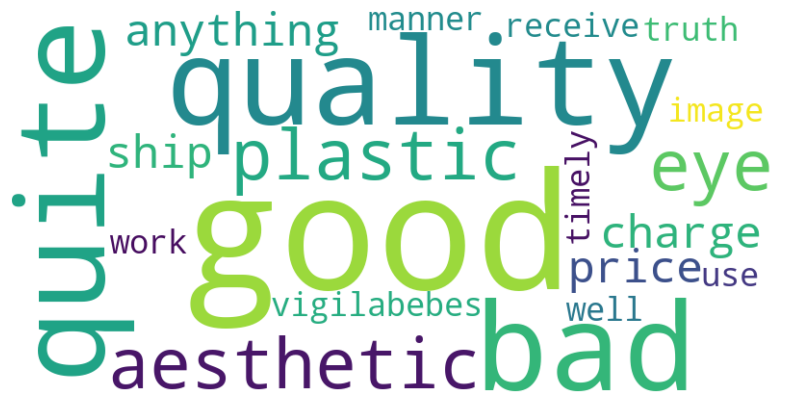

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (assuming you have a pandas Series)
data2 = pd.Series([
    ["good", "aesthetic", "eye", "plastic","good"],
    ["not", "like", "anything", "ship", "charge", "price"],
    ["like", "vigilabebes", "image", "quality", "quite", "good"],
    ["truth", "not", "bad", "work", "quite", "well","good"],
    ["receive", "timely", "manner", "quality", "bad", "use"]
])

# Convert list of words into a single string
text = " ".join([" ".join(words) for words in data2])

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# .generate(text) function in WordCloud takes a string of words and creates a word cloud visualization from it.

# How .generate(text) Works
# It analyzes the frequency of words in the given text.
# Words that appear more frequently are displayed larger in the word cloud.
# It randomly places words, ensuring that important words stand out.
# It removes common stopwords (like "the", "and", "is") unless you specify otherwise.

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()


In [37]:
#!pip install wordcloud

In [38]:
clean_text5
#pandas series

0                        [good, aesthetic, eye, plastic]
1      [not, like, anything, ship, charge, price, pro...
2      [like, vigilabebes, image, quality, quite, goo...
3      [truth, not, bad, work, quite, well, managemen...
4      [receive, timely, manner, quality, bad, use, p...
                             ...                        
995    [good, quality, meet, exactly, indicate, also,...
996    [eyebrow, good, comfortable, enough, necessary...
997    [little, mislead, imply, buy, box, send, one, ...
998    [unthinkable, get, cover, adapt, perfectly, fa...
999    [fryer, spend, liter, like, least, take, long,...
Name: translated_review, Length: 1000, dtype: object

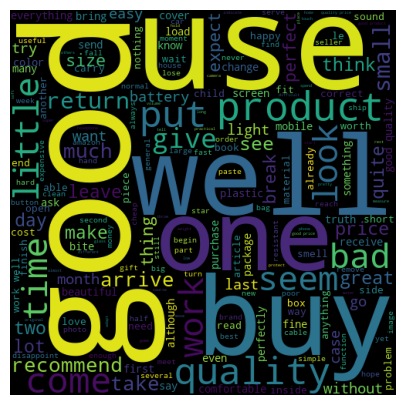

'good aesthetic eye plastic not like anything ship charge price product fatal like vigilabebes image quality quite good color black white plus like lot talk baby calm also put relax music song measure temperature room notify shot every charge microusb cable mobile not yet try battery life tell signal quality good top floor look could improve spanish instruction come intuitive truth not bad work quite well management not child year old well cost bite normal great inconvenience duration battery quickly spend especially car receive timely manner quality bad use person ladder fold insecure nothing recommend good quality price go well job like purchase thread quite break several would buy second buy mother general go quite one cost bite fold come factory double vinyl not allow already return resistant faithfully fulfill criticism package inappropriate quality glove since adhere ball difficult get pair unimportant data second time buy give lot use beautiful color paste put new cross leave le

In [39]:
## requirements of ngrams we have given list of tokens  
## in word2vec we have to merge all records that we have and after making one string of all reviews then we can give it to the wordloud
#wordcloude accpets single paragraph and then display most frequent word
#in our clean_text5 we have list of token
from wordcloud import WordCloud # pip install wordcloud
import matplotlib.pyplot as plt

#Word cloud on clean_text
def generate_wordcloud(data):
    """
    Generate and display a word cloud from a pandas Series containing lists of words.
    
    Parameters:
    data (pd.Series): A pandas Series where each row contains a list of words.
    """
    # Convert list of words into a single string
    text = " ".join([" ".join(words) for words in data.dropna()])

    # Create WordCloud
    wordcloud = WordCloud(width=500, height=500, background_color='black').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")  # Hide axes
    plt.show()
    return text
generate_wordcloud(clean_text5)

#### wordcloude on original data

In [40]:
data

stars                                  translated_review
0        3  Very good aesthetics but eye because they are ...
1        2  What I did not like anything is shipping charg...
2        5  I like this vigilabebes, the image quality is ...
3        4  The truth is not bad is that it works quite we...
4        2  Received in a timely manner, quality is bad or...
..     ...                                                ...
995      5  Very good quality and meets exactly what is in...
996      5  The eyebrow is very good and very comfortable,...
997      1  A little misleading imply that you buy a box t...
998      5  Unthinkable get some covers at that price.They...
999      2  The fryer is small.ration for 2 people.You spe...

[1000 rows x 2 columns]

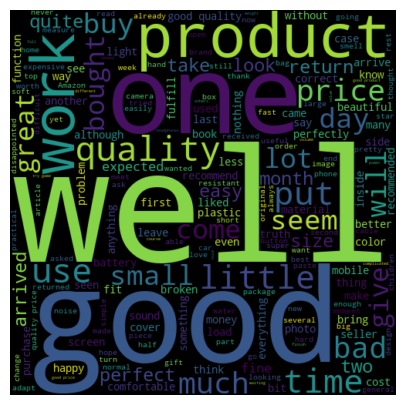

'Very good aesthetics but eye because they are plastic !!! What I did not like anything is shipping charge, more than 10% of the price of the product, fatal. I like this vigilabebes, the image quality is quite good, it is in color, and in black and white when there is no light.A plus that I liked a lot is that you can talk to the baby to calm down.You can also put relaxing music (there are 4 songs), it measures the temperature of the room and you can notify you for the shots every 2.4, 6 or 8 hours.They are charged by Microusb cable, as in mobile phones.I have not yet tried the battery life, I will tell you.The signal quality is good, I have it on the top floor, and looks good.It could be improved with Spanish instructions, but come on, which is very intuitive. The truth is not bad is that it works quite well and the management is not very complicated.My child is 5 years old and well it costs him a bit but it is normal is learning.The greatest inconvenience is the duration of the batte

In [45]:
#wordclou on on original Data
def generate_wordcloud(data, column_name):

    text = " ".join(data[column_name].dropna())

    # Create WordCloud
    wordcloud = WordCloud(width=500, height=500, background_color='black').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Hide axes
    plt.show()
    return text
generate_wordcloud(data,"translated_review")

# Text Vectorization

# for text vectorization we  will be using algorithms  
- 1. One hot Encoding
- 2. Count vectorizer
- 3. TFIDF
- 4. Word2Vec

In [42]:
fruit                 Apple  Banana   cherry  orange
Apple                 1        0        0       0
Banana                0        1
cherry
orange
Apple
Orange
Apple                 1         0       0
                                     
#dummy column==categories

SyntaxError: invalid syntax (1458926036.py, line 1)

In [ ]:
#!pip install yellowbrick

In [46]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.cluster import KMeans   #unsupervised
#log regression==>cm,acc,pre,recall
from sklearn.metrics import silhouette_score  #Evaluation
from yellowbrick.cluster import SilhouetteVisualizer

### CV example

Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data. To show you how it works let’s take an example:

- text = ['Hello my name is james, this is my python notebook']- 
The text is transformed to a sparse matrix as shown below
.




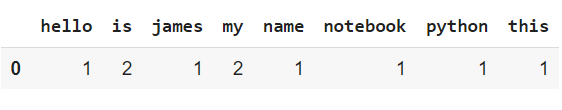

In [ ]:
Corpus===>Training data: words
Documents===>sentences

- we can provide list of documents to the CV
- Accepts data in the form of list of every sentence
- First extract unique words from all documnents
- Make list of that uniques words in alphabetical order
- then compare with every documnets and make vector of count of each word


In [47]:
# Sample documents
documents = [
    "I love the machine !learning learning",
    "I love natural? language processing",
    "I enjoy learning new things"
]
#uniq words[Love,machine,learning,natural,langauge,processing,enjoy,new,things]
# Create Count Vectorizer instance
vectorizer = CountVectorizer()  #object

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Get the feature names (unique words)
feature_names = vectorizer.get_feature_names_out()   #unique word list

# Print the transformed matrix
print(X.toarray())

# Print the feature names
print(feature_names)

#unique words=["Love","the","machine","learning","natural","langauge","processing","enjoy",new","things"]
#arrange alphabetically=["enjoy","langauge","learning","Love","machine","natural","new","processing","the","things",]

[[0 0 2 1 1 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0]
 [1 0 1 0 0 0 1 0 0 1]]
['enjoy' 'language' 'learning' 'love' 'machine' 'natural' 'new'
 'processing' 'the' 'things']


### TF-IDF

In essence, what TF-IDF does is that it assigns a score to each word in your “vocabulary list” based on how relevant it is (ie. Provides context). So words that are frequently occurring, or are just rare occurrences, are considered irrelevant and gets a low score. 

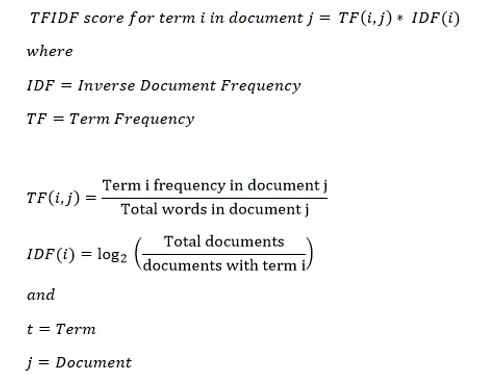

### Note: It can be possible for a term to not appear in the corpus at all, which can result in a divide-by-zero error. One way to handle this is to take the existing count and add 1. Thus making the denominator (1 + count). An example of how the  popular library scikit-learn handles this can be seen below.



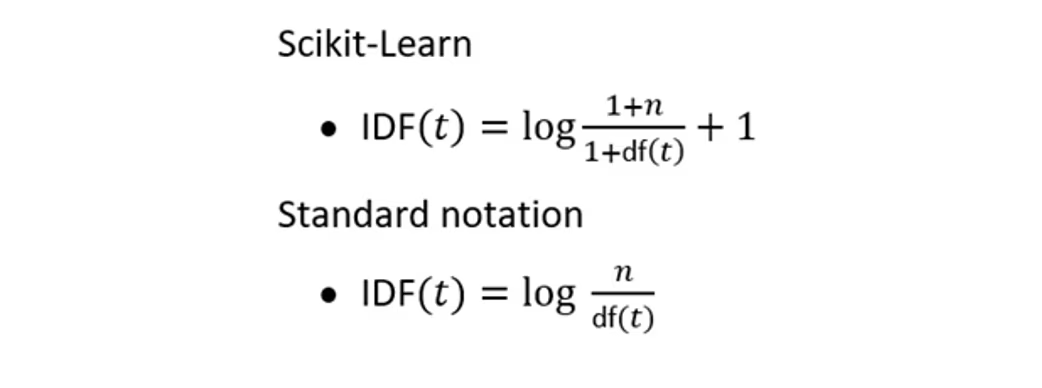




100 movie reviews
1.good movie
2.amazing movie
3.bad movie
unique=[good,amazing,bad,movie]
TF(movie)=1/2
DF=3/3=1
IDF=log(1/df)=log(1)=0

Tf*IDF(movie)=1/2*0=0



In [48]:
documents = ["good movie","amazing movie","bad movie"]


# Create TF-IDF Vectorizer instance
tfidf_vectorizer = TfidfVectorizer()  #object

# Fit and transform the documents
X_tfidf = tfidf_vectorizer.fit_transform(documents)
idf_values = tfidf_vectorizer.idf_  #attribute
# Get the feature names (unique words)
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Print the transformed matrix
print(X_tfidf.toarray())

# Print the feature names
print(feature_names_tfidf)
idf_values

#alphabetically_unique words=[amazing,bad,good,movie]



[[0.         0.         0.861037   0.50854232]
 [0.861037   0.         0.         0.50854232]
 [0.         0.861037   0.         0.50854232]]
['amazing' 'bad' 'good' 'movie']


array([1.69314718, 1.69314718, 1.69314718, 1.        ])

In [49]:
documents = [
    "love machine learning",
    "love natural learning language processing",
    "enjoy learng new things"
]
#[love, machine, learning]

# Create TF-IDF Vectorizer instance
tfidf_vectorizer = TfidfVectorizer()  #object

# Fit and transform the documents
X_tfidf = tfidf_vectorizer.fit_transform(documents)
idf_values = tfidf_vectorizer.idf_
# Get the feature names (unique words)
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Print the transformed matrix
print(X_tfidf.toarray())ni

# Print the feature names
print(feature_names_tfidf)  #unique words
idf_values

#alphabetically_unique words=[enjoy,language,learning,love,machine,natural,new,processing,things]



[[0.         0.         0.42544054 0.54783215 0.72033345 0.
  0.         0.         0.        ]
 [0.         0.50461134 0.29803159 0.38376993 0.         0.50461134
  0.         0.50461134 0.        ]
 [0.54645401 0.         0.32274454 0.         0.         0.
  0.54645401 0.         0.54645401]]
['enjoy' 'language' 'learning' 'love' 'machine' 'natural' 'new'
 'processing' 'things']


array([1.69314718, 1.69314718, 1.        , 1.28768207, 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.69314718])

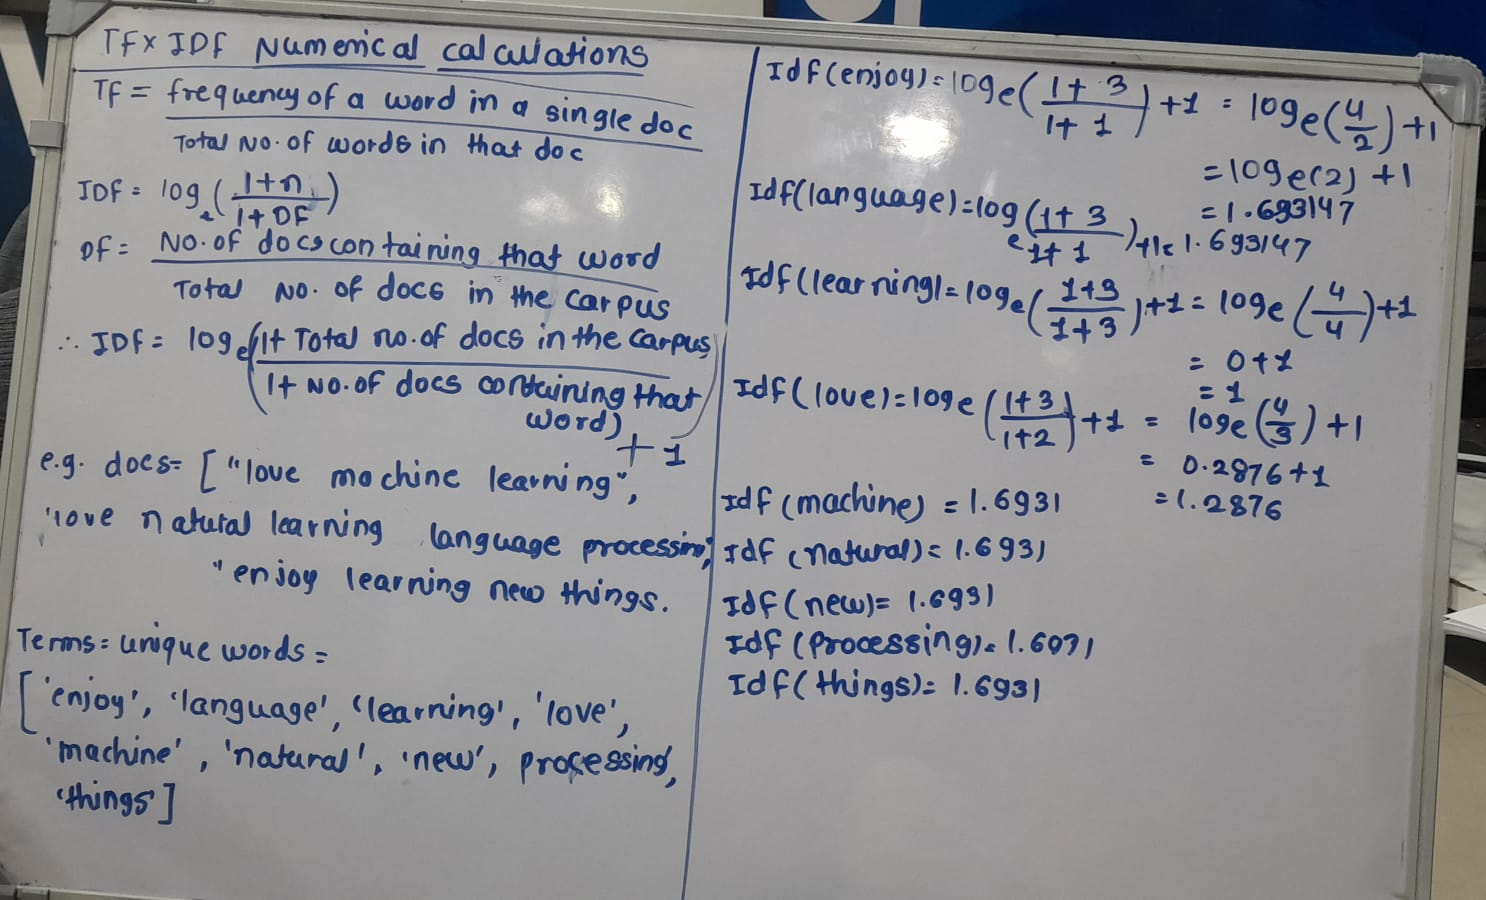

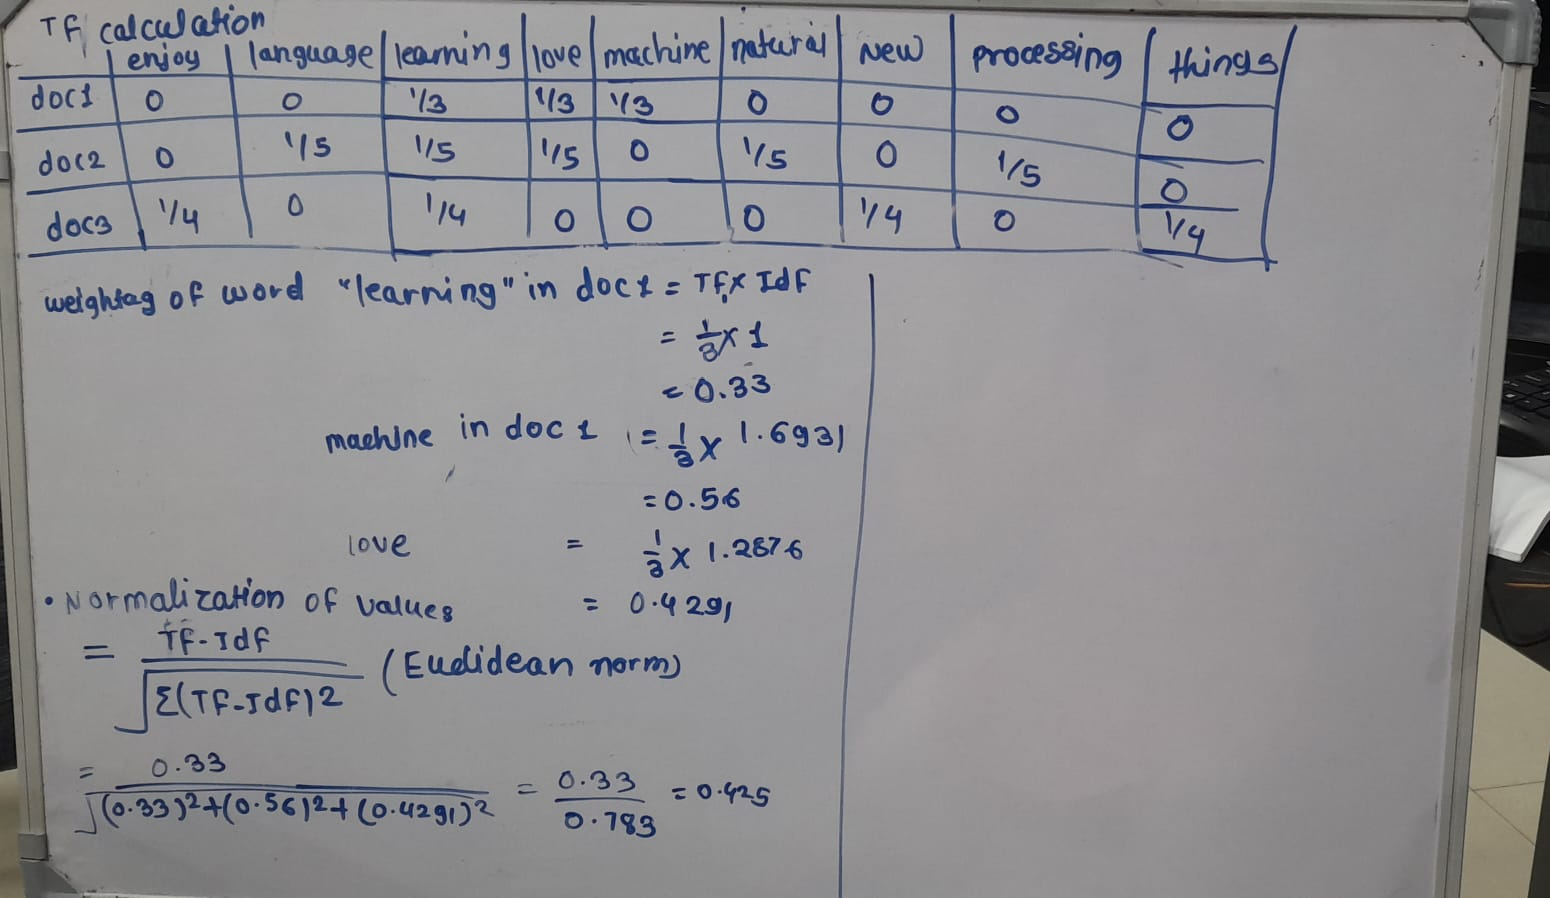

In [ ]:
0.4291/0.783

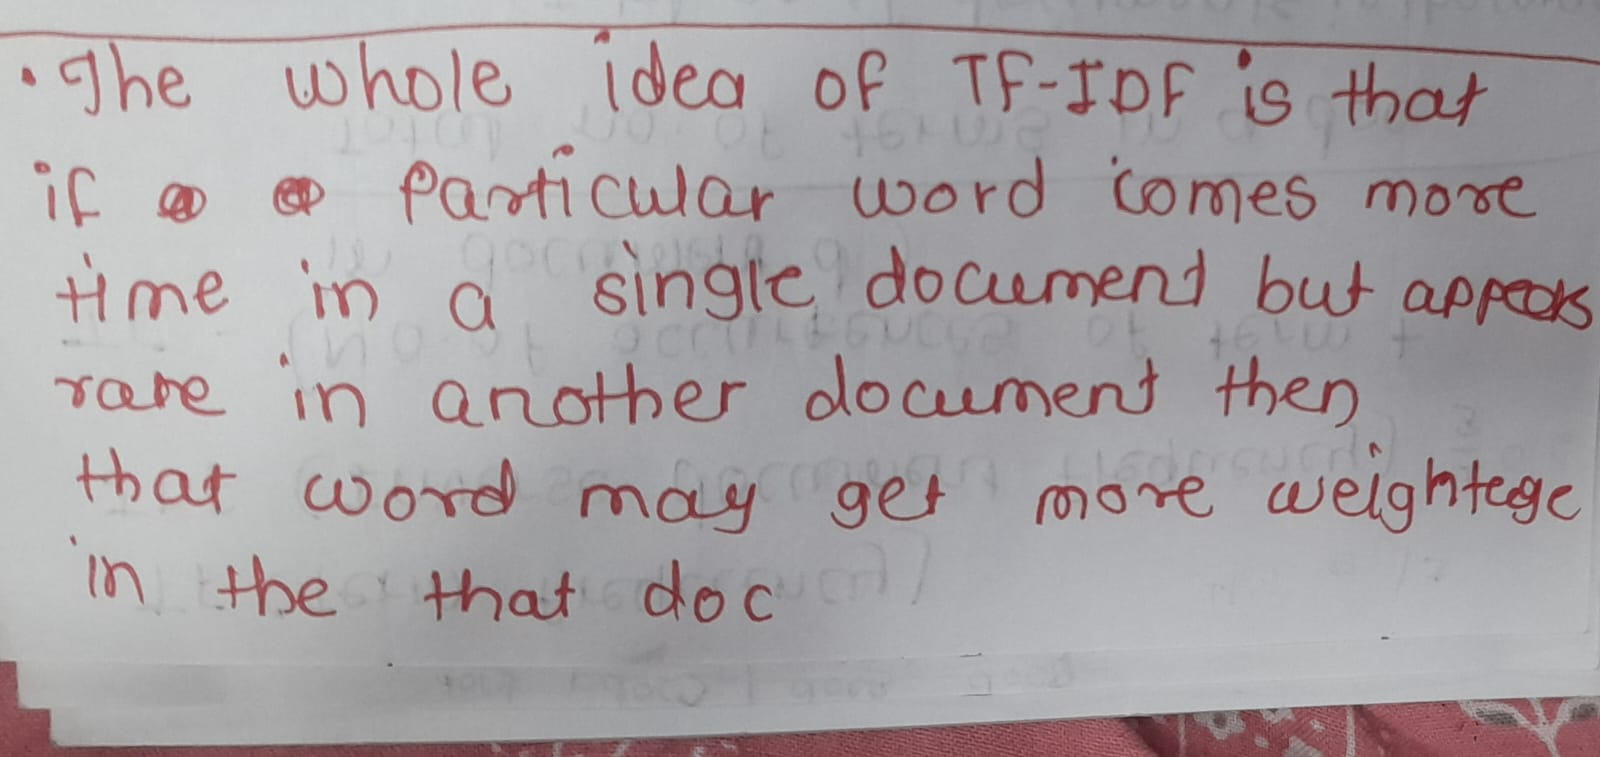

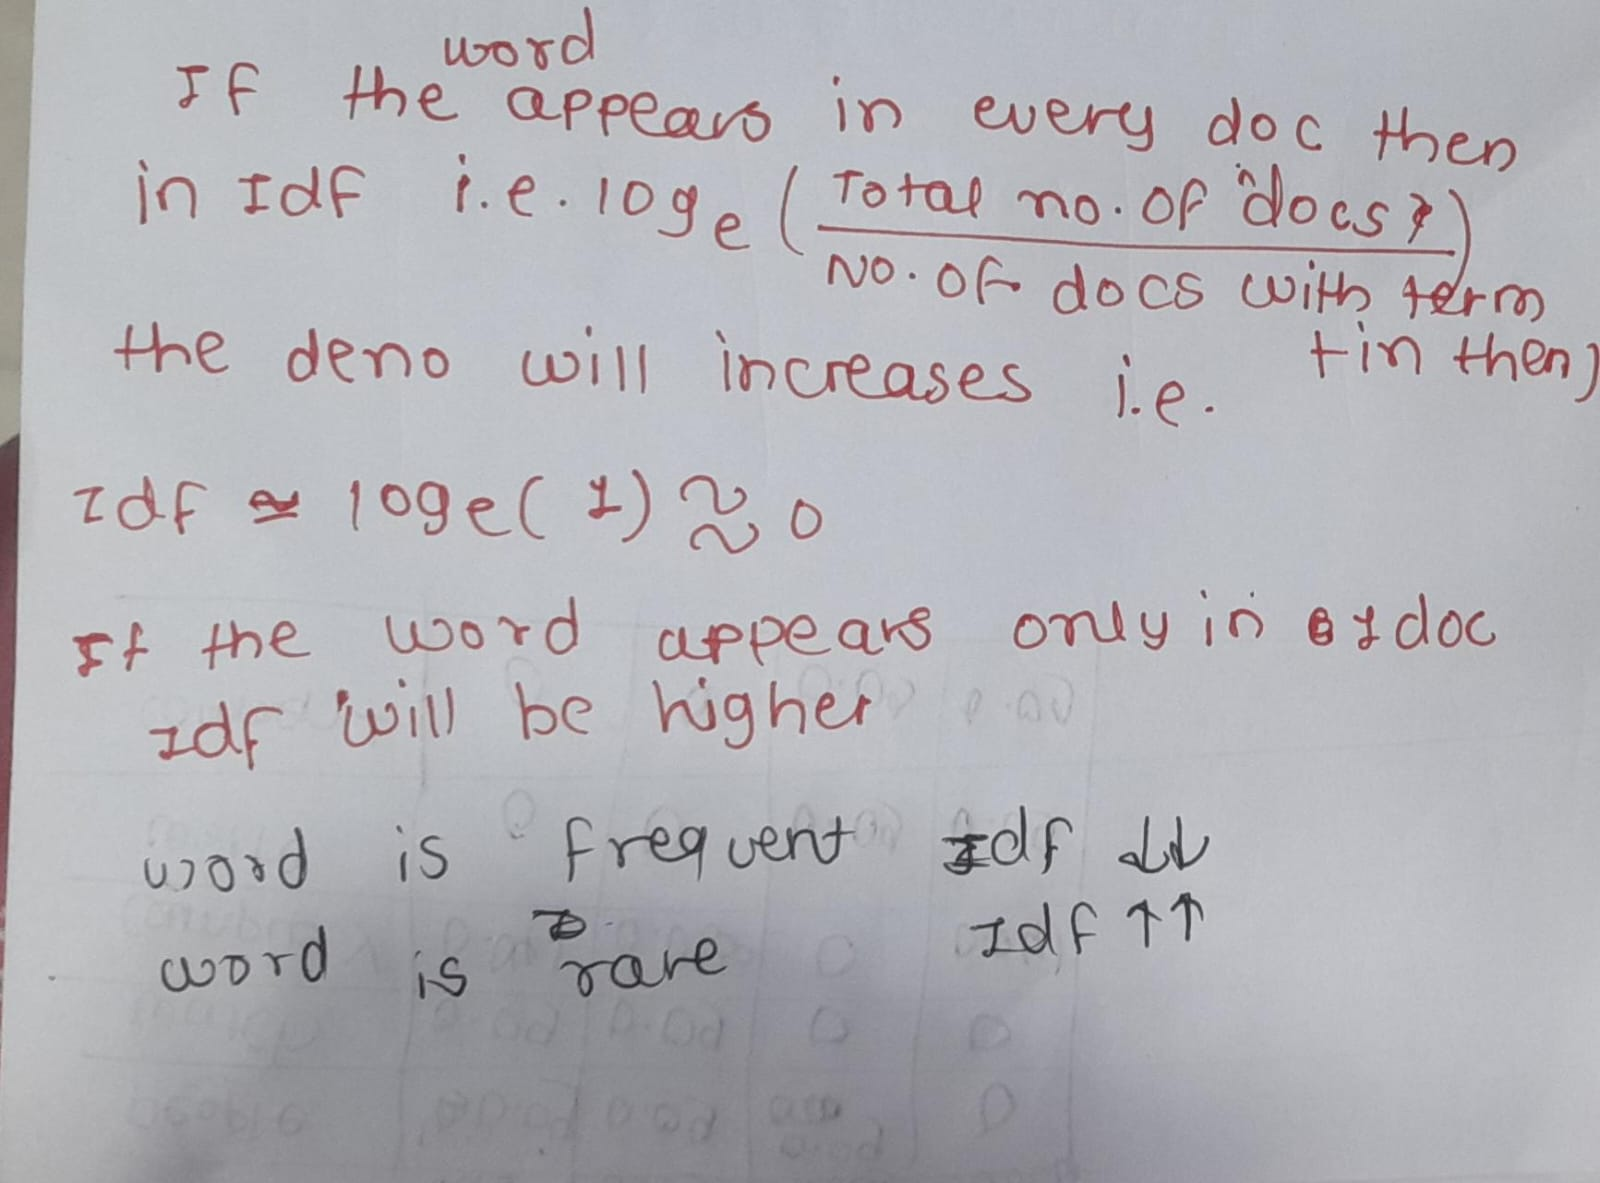

# Word2vec Therory

###### Word2Vec is a word embedding technique that converts words into numerical vectors, capturing semantic and syntactic relationships between them. It was introduced by Google in 2013.



### Why Word2Vec Embedding?

When we use vectorization methods like TF-IDF, Bag of words etc., they converts your sentences in to vectors of size 
equals the length of unique words in whole vocabulary.
Using W2V Embedding we can limit the length of vectors(Dimensionality Reduction).
When you try to model your text data you cannot feed text to model, model needs numbers, so you convert text to numbers.
So we needed embeddings to better model our text data.

##### Diff between word2vec,TfIDF,Counvectorizer

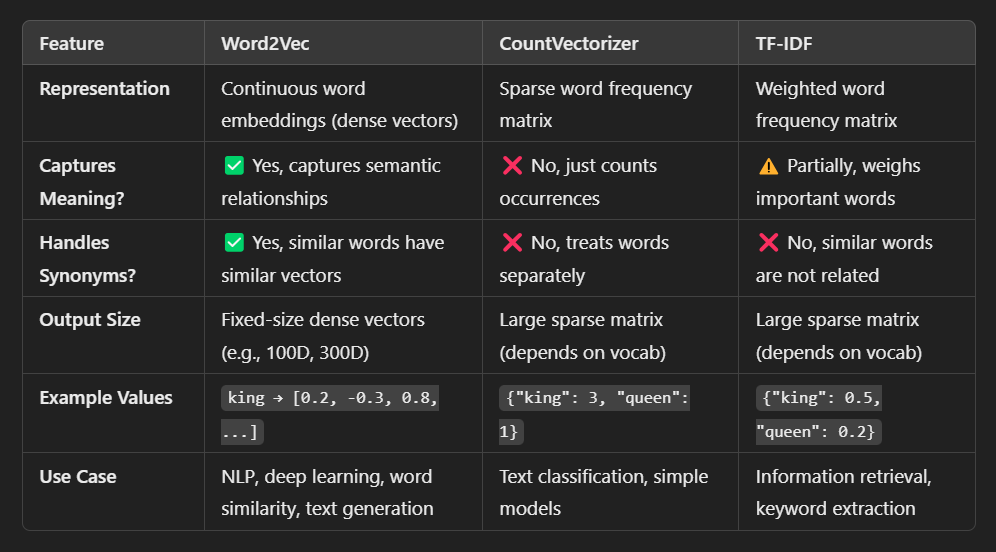

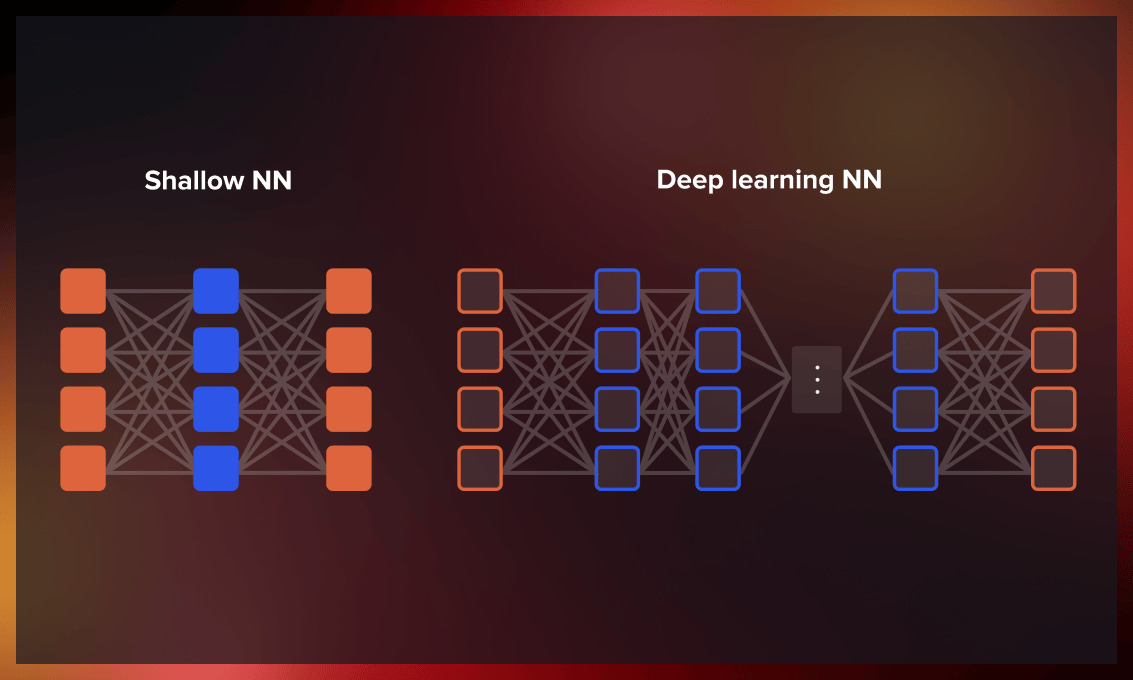

##### What is mean by semantic meaning ? 

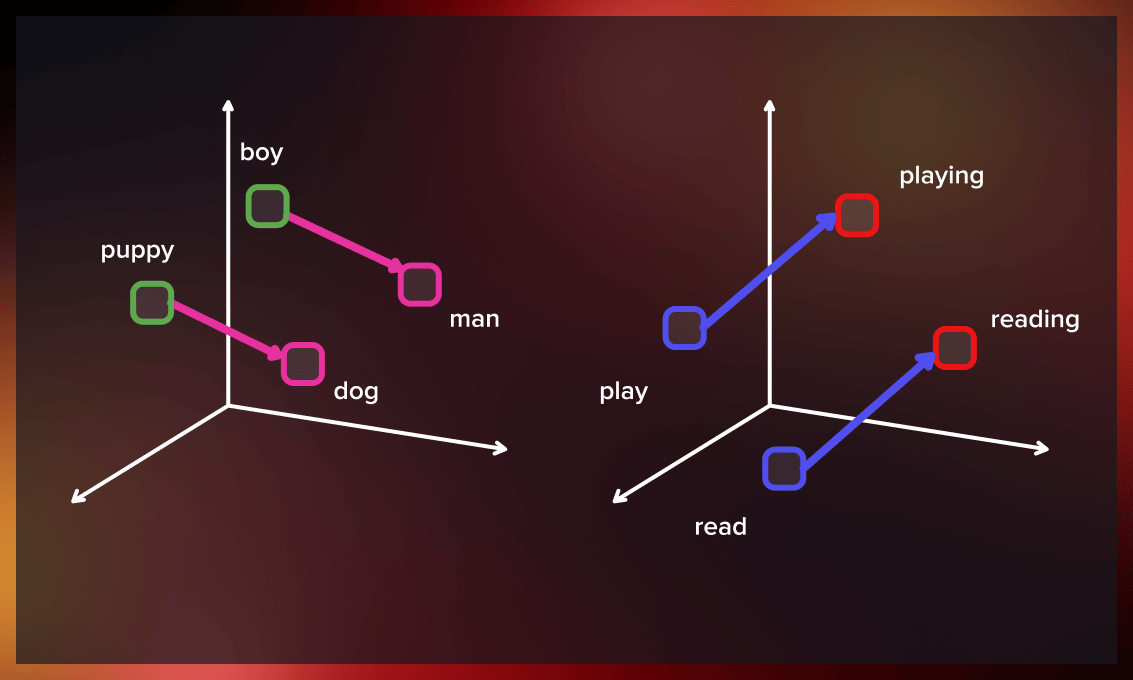

#### We can crteate word2vec model on our corpus or we have pretrianed w2v

In [ ]:
Google news 3 billion words


## How it Works

#### Types of Word2Vec embedding 
cbow and skip gram

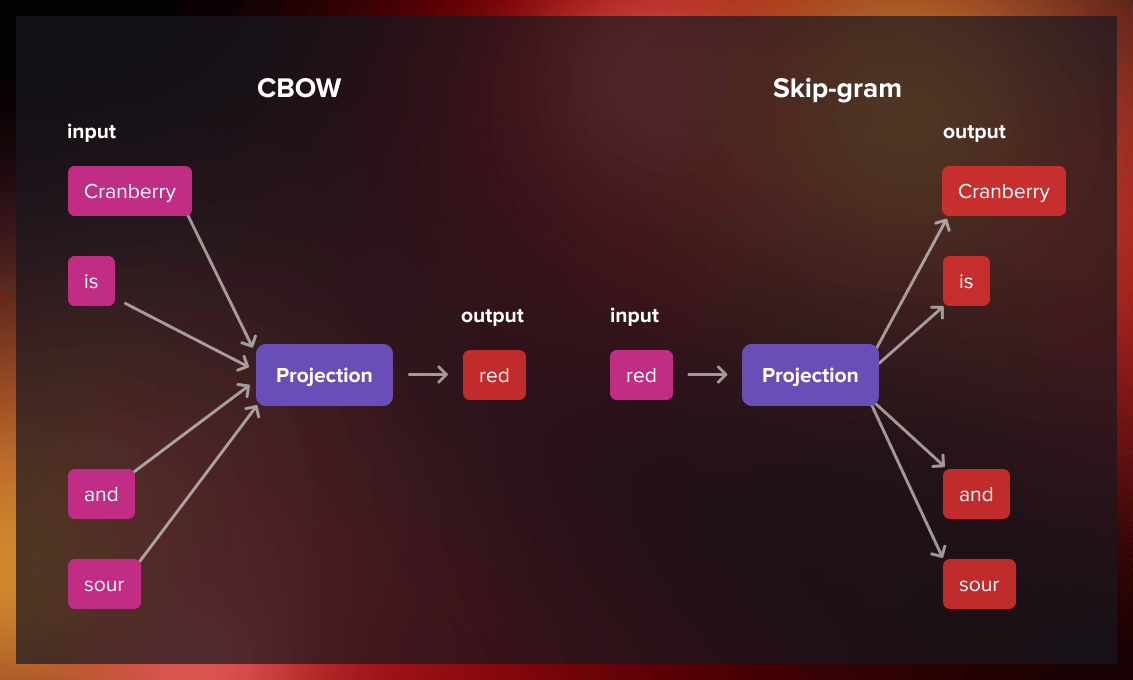



  - CBOW :
The CBOW model learns to predict a target word leveraging all words in its neighborhood. The sum of the context vectors are used to predict the target word. The neighboring words taken into consideration is determined by a pre-defined window size surrounding the target word.

  - SkipGram :
    The SkipGram model on the other hand, learns to predict a word based on a neighboring word. To put it simply, given a word, it learns to predict     another word in it’s context.

### Steps

- 1. Make list of unique words [2328]
- 2. A preliminary method is a “bag of words” model which encodes words using a one-hot scheme.

If our dataset contains the sentences:
“I like the new movie!”, “I love the weather.”

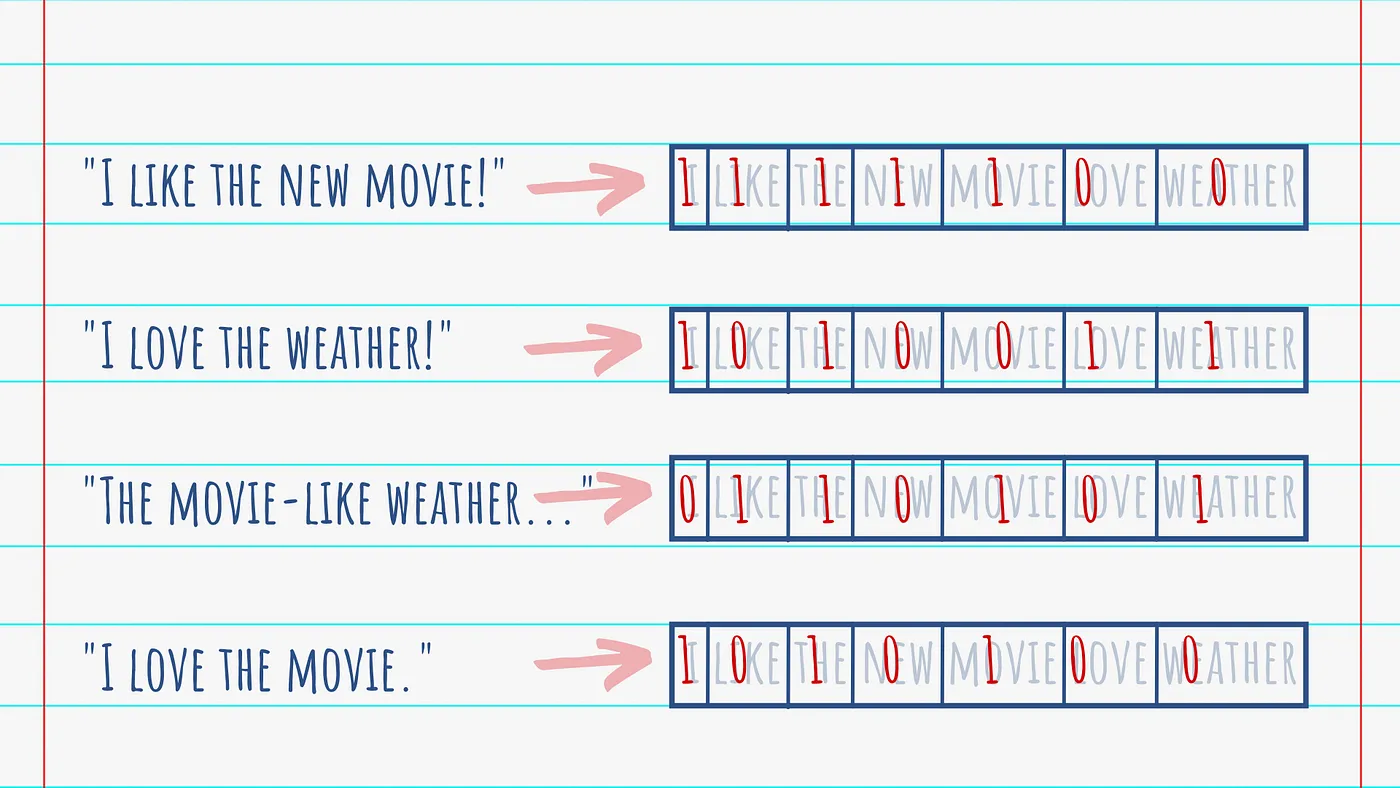

- 3.The context words are first passed as an input to an embedding layer (initialized with some random weights) as shown in the Figure below.

- 4.The word embeddings are then passed to a hidden layer where we average out the word embeddings.

- 5.We then pass these embeddings to a dense SoftMax layer that predicts our target word. We match this with our target word and compute the loss and then we perform backpropagation with each epoch to update the embedding layer in the process.

### Step-by-Step Example (CBOW Model)

##### 1. Define a Simple Corpus

##### 2. Define Vocabulary and One-Hot Encoding

##### 3. Initialize Word Embedding Matrix

##### 4. Forward Pass (Input to Hidden Layer)

##### 5. Output Layer (Prediction of Target Word)

##### 6. Apply Softmax

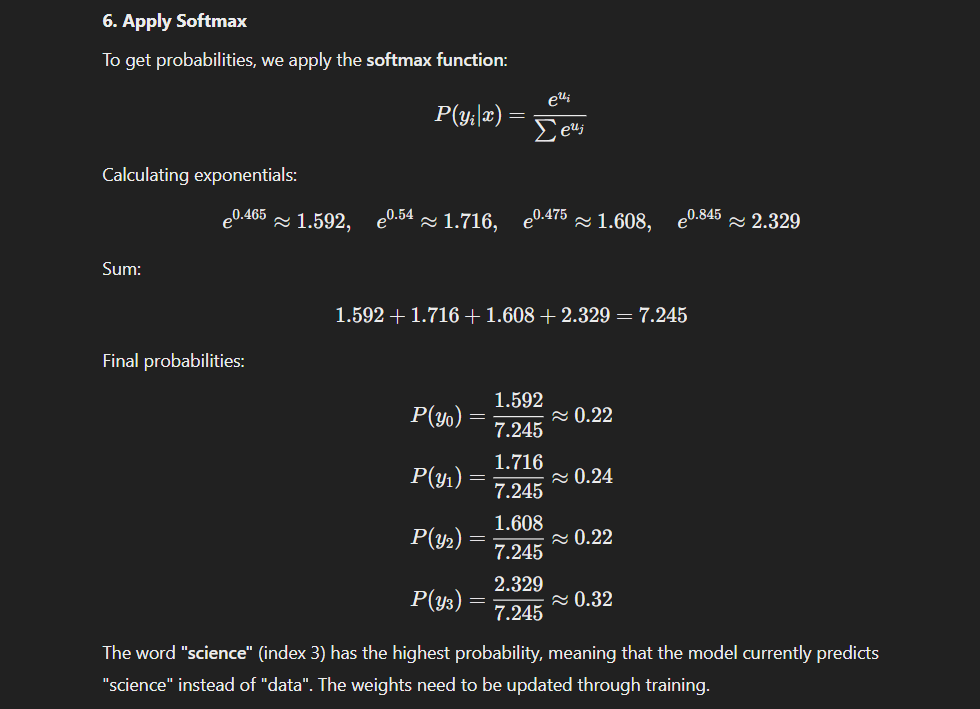

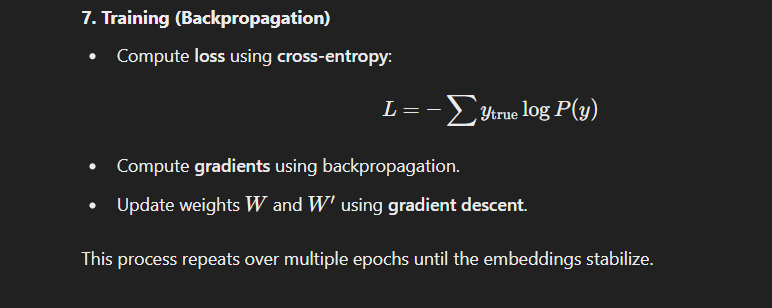

##### Visualizing Words in vector space

In [3]:
from IPython.display import display, HTML

gif_url = "https://miro.medium.com/v2/resize:fit:828/format:webp/1*Y7K_-6HZqbii1V8Ms6SALQ.gif"  # Replace with your GIF URL
display(HTML(f'<img src="{gif_url}" width="1000px">'))


# Cosine similarity

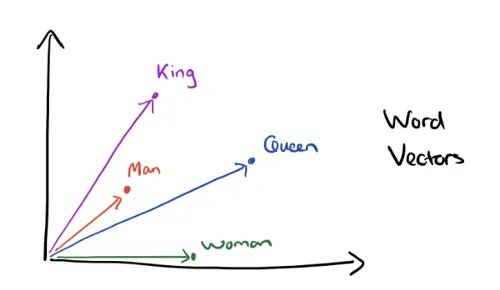

In [4]:
from IPython.display import display, HTML

gif_url = "https://preview.redd.it/video-series-the-story-of-word2vec-v0-byx7mvb1jgfc1.gif?width=1152&auto=webp&s=5ac61c2fc9f464b74d58ec6bf050baf289415d43"  # Replace with your GIF URL
display(HTML(f'<img src="{gif_url}" width="1000px">'))



Why Cosine Similarity?
Word2Vec represents words as high-dimensional vectors.
The cosine similarity measures the angle between two vectors, not their magnitude.
Since word embeddings focus on direction rather than magnitude, cosine similarity is a good choice.
Cosine similarity is a measure used to determine how similar two text documents are, based on their vector representation. It calculates the cosine of the angle between two vectors in a multi-dimensional space. The cosine of 0° is 1, meaning that the vectors are identical, and the cosine of 90° is 0, meaning that the vectors are orthogonal (completely dissimilar).

In [ ]:
[0.22,0.24,0.22,0.32]
#"data"=[0,0,1,0]

#"science"=[0,0,0,1]
#love"=[0,1,0,0]

# Cosine Similarity

In [ ]:
cos(0)=1  almost similar
cos(1)=0.9999   similar
cos(90)=0
cos(180)=-1    almost opposite

In [ ]:
Cosine similrity
king ==>[kings,prince,palace,rich,power]

##### Why Does Word2Vec Use Cosine Similarity?

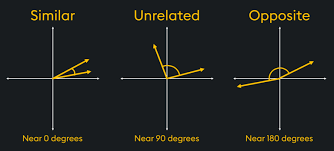

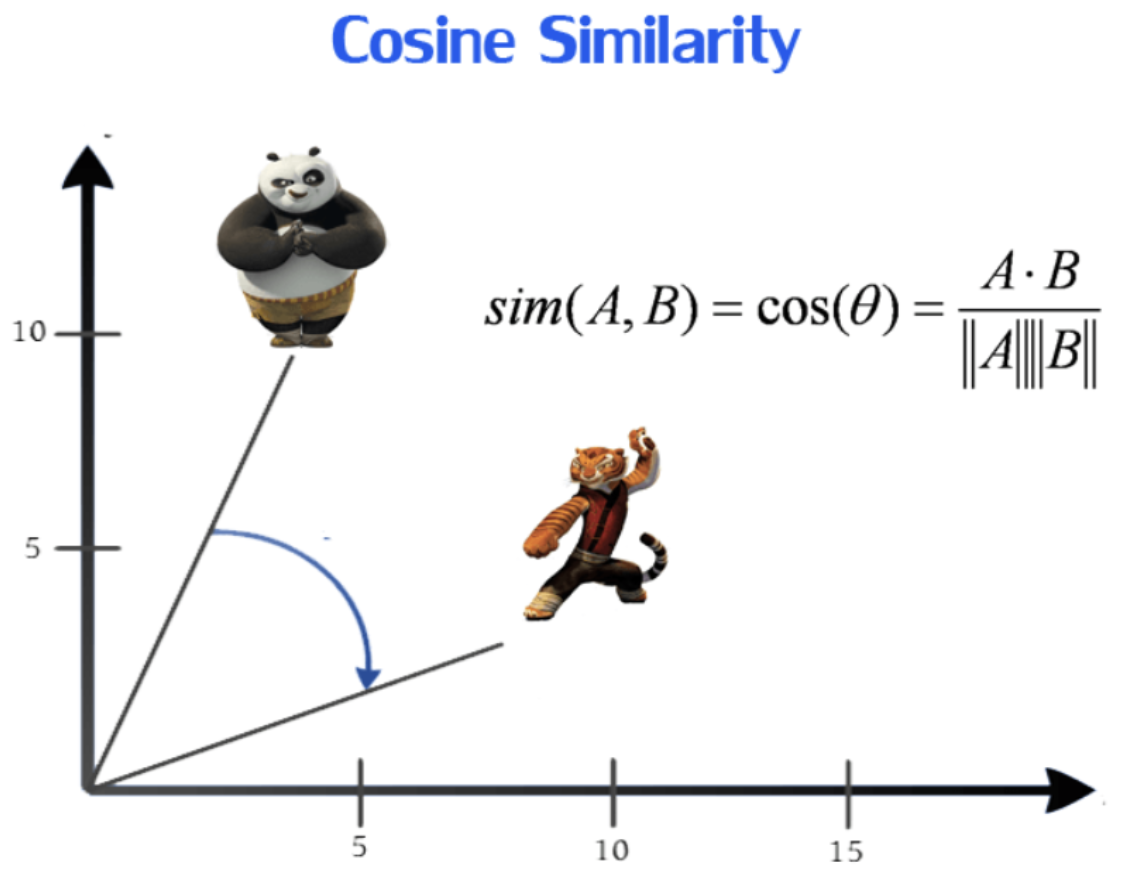

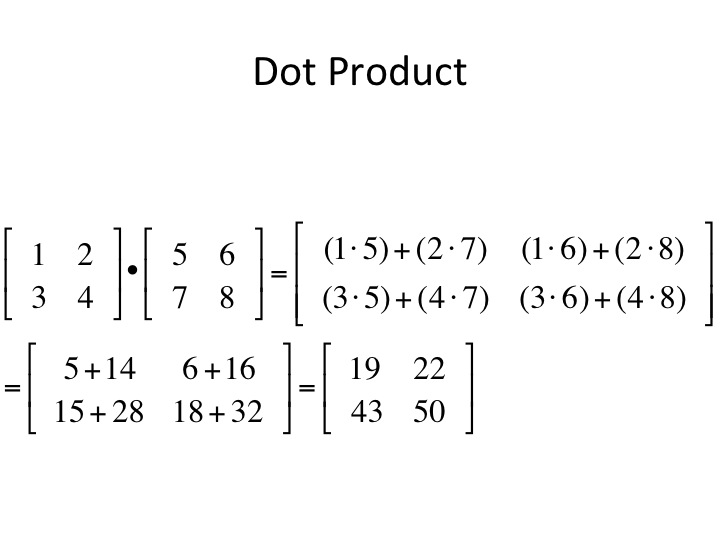

##### Why Not Just Measure Distance?

In [ ]:
Imagine we have two words represented as vectors in a 2D space:

Word Like (small numbers): [2, 3]
Word Love (big numbers, same direction): [200, 300]
Word Tower (different meaning): [5, 0]


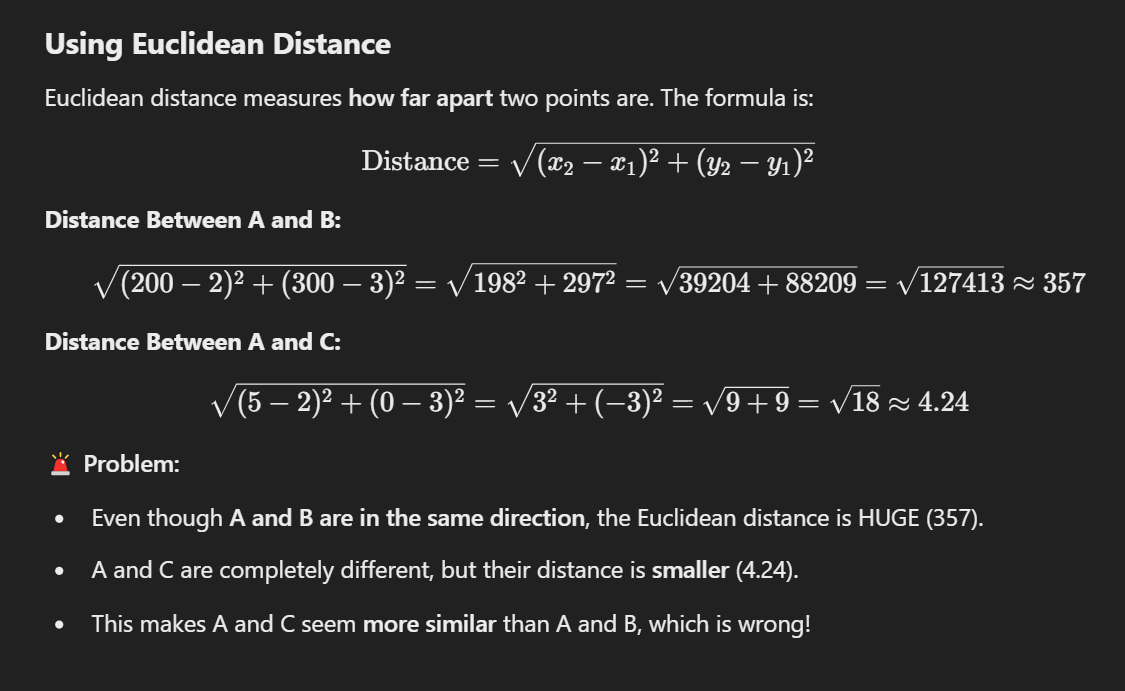

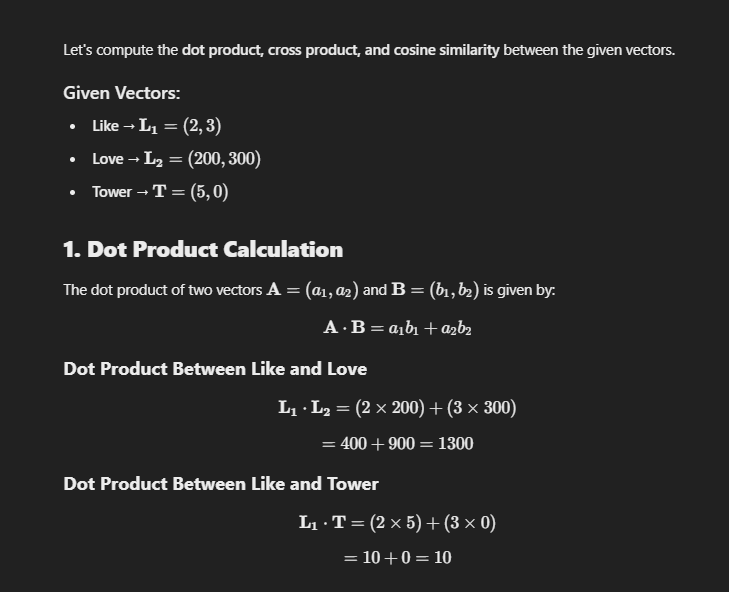

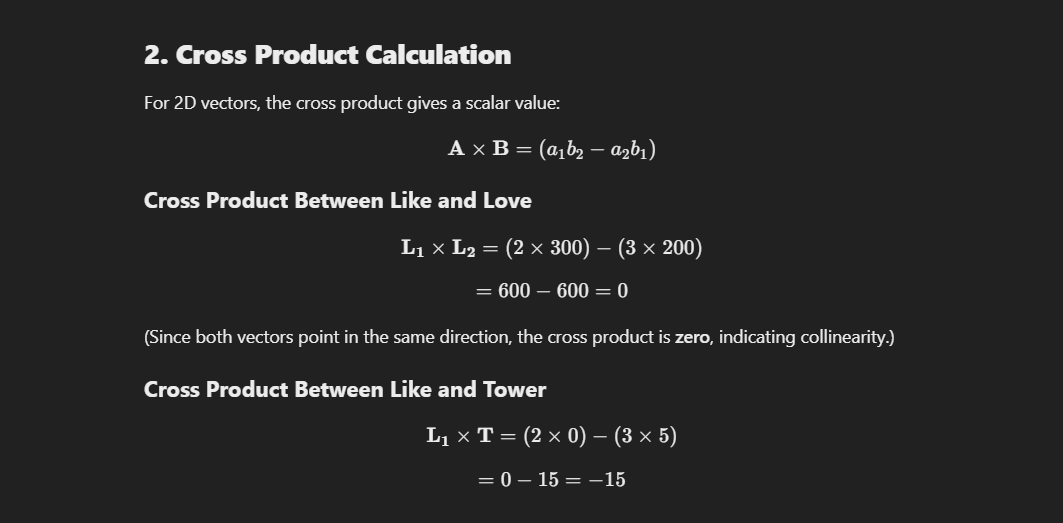

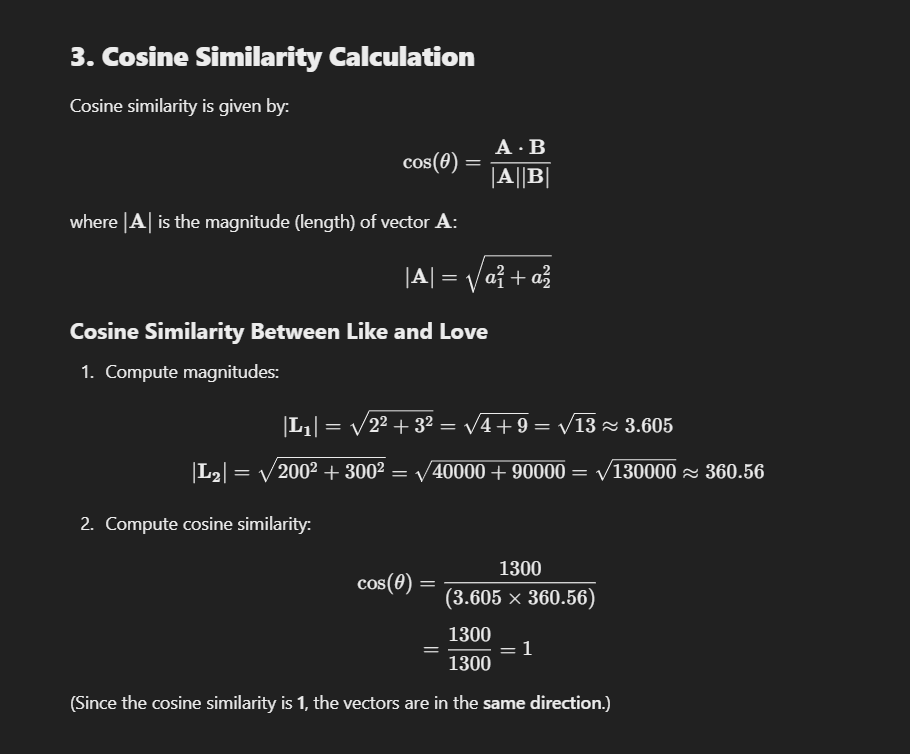

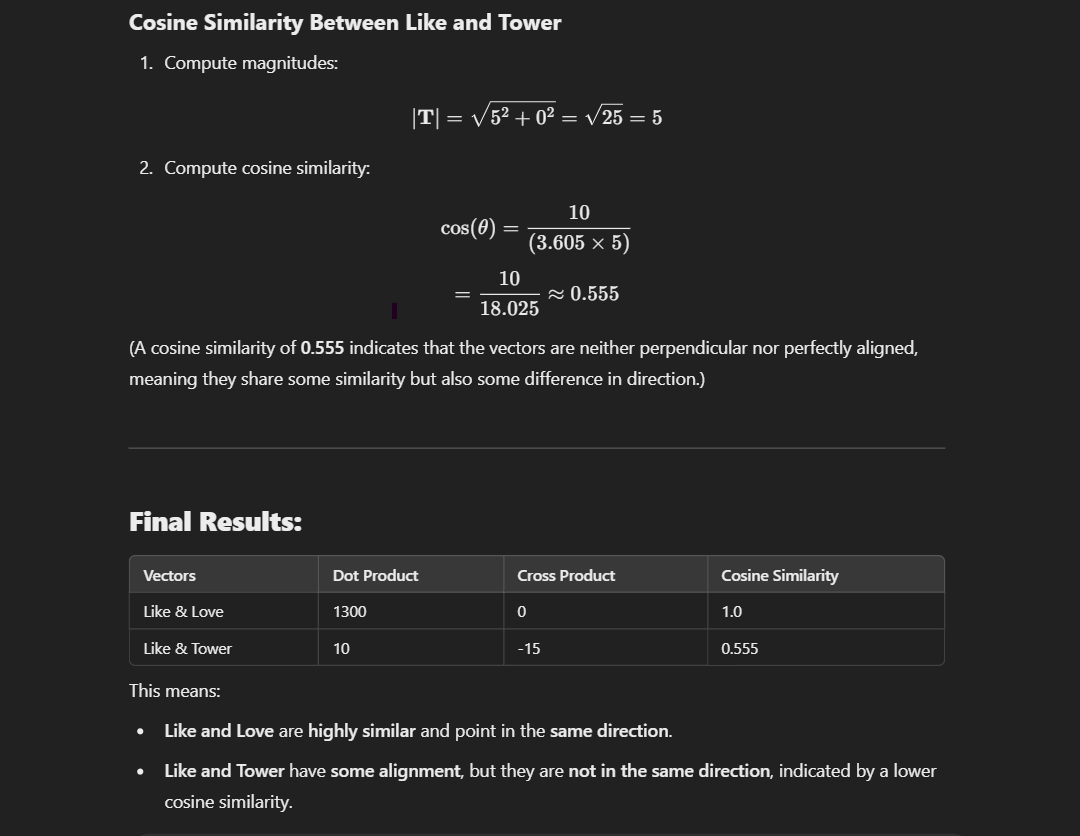

- The range of cosine similarity is:
−1≤cos(θ)≤1

Interpretation of Values:
- Cosine Similarity = 1 → Perfect Similarity

The vectors point in exactly the same direction (e.g., synonyms like happy and joyful).
- Cosine Similarity = 0 → No Similarity

The vectors are perpendicular (90° apart), meaning they have no relationship (e.g., dog and table).
- Cosine Similarity = -1 → Perfectly Opposite

The vectors point in completely opposite directions, meaning they are antonyms (e.g., good and bad).
Typical Range in Word2Vec
In Word2Vec, cosine similarity usually ranges between 0 and 1 because word embeddings rarely point in opposite directions. So, negative values are uncommon in real-world NLP tasks.

## Cosine Similarity Example


Assume we have a vocabulary with the following words: ["cat", "dog", "mat", "garden", "ball", "play", "loves", "the", "is", "on", "in"].


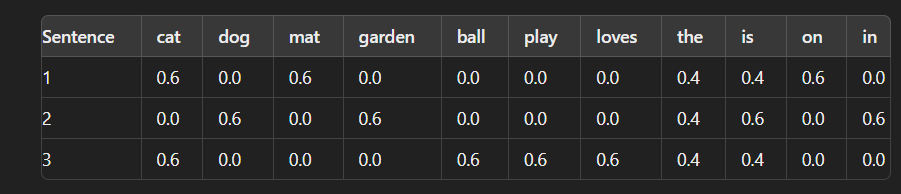

In [ ]:
Calculate Cosine Similarity

The cosine similarity between the user input and each sentence in the dataset is calculated as follows:

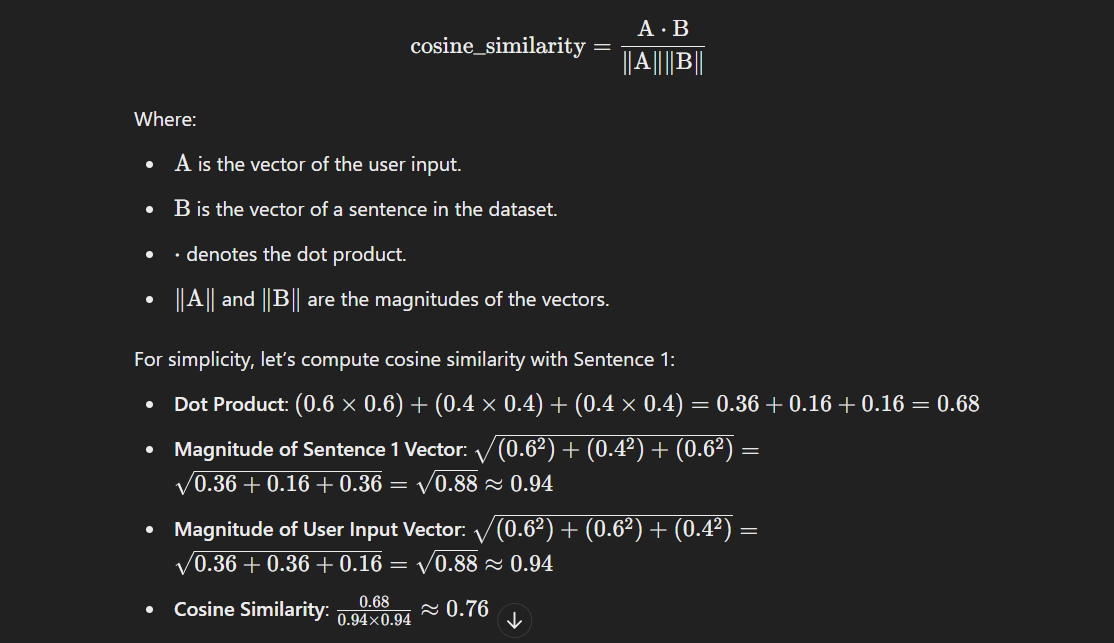

# Implementation using Gensim :



- First install gensim : pip install — upgrade gensim

Gensim provides the Word2Vec class for working with a Word2Vec model.

Learning a word embedding from text involves loading and organizing the text into sentences and providing them to the constructor of a new Word2Vec() instance. For example:




In [ ]:

sentences ="I am learning NLP"   
model = Word2Vec(sentences)


There are many parameters on this constructor; a few noteworthy arguments you may wish to configure are:
## Hypermarametrs
- size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- window: (default 5) The maximum distance between a target word and words around the target word.
The model considers a context window of words around each target word. For example, if the context window size is 2, the context words for "sentence" in the phrase "this is the final sentence for word2vec" would be ["the", "final", "for", "word2vec"].


- min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- workers: (default 3) The number of threads(CPU cores) to use while training.
  Word2Vec involves heavy computational tasks like training Skip-gram or CBOW models, computing word embeddings, and performing backpropagation.
By increasing the workers value, you allow the model to run on multiple CPU cores, significantly reducing training time.
- sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

After the model is trained, it is accessible via the “wv” attribute. This is the actual word vector model in which queries can be madel.

For example, you can print the learned vocabulary of tokens (words) as follows:

words = list(model.wv.vocab)
print(words)
You can review the embedded vector for a specific token as follows:

print(model[‘word’])

- A trained model can then be saved by calling the **save_word2vec_format()** function on the word vector model.

- By default, the model is saved in a binary format to save space. For example:

model.wv.save_word2vec_format(‘model.bin’)

- When getting started, you can save the learned model in ASCII format and review the contents.You can do this by setting binary=False when calling the save_word2vec_format() function, for example:

model.wv.save_word2vec_format(‘model.txt’, binary=False)

- The saved model can then be loaded again by calling the Word2Vec.load() function. For example:

model = Word2Vec.load(‘model.bin’)

In [5]:
from gensim.models import Word2Vec
sentences = [["the", "quick", "brown", "fox"], ["jumps", "over", "the", "lazy", "dog","dogs"]]
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, workers=4)

# Getting the vector for the word 'dog'
vector = model.wv['dog']
print(vector)
#Backend Calculation
#ohe==quick=[0,1,0,0,0,0,0,0,0,0]==>op
#[1,0,0....]==>the
#[0,0,1...]==>brown
#fox=[0,0,0,1...]
#w1,w2,w3
#sigmoid
vector = model.wv['fox']
print(vector)


[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
[-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]


In [51]:
s=[["my","name","is","chetana"],["i" ,"am","data","scientist"]]


In [52]:
from gensim.models import Word2Vec
# define training data
sentences = [["this" ,"is", "the", "first","final", "sentence", 'for', 'word2vec'],
["this", "is", "the", "second", "sentence"],
["yet", "another", "sentence"],
["one", "more", "sentence"],
["and", "the", "final", "sentence"]]
# train model


model = Word2Vec(sentences, min_count=1,vector_size=20)
#min_count=1 means words appearing less than once are ignored, but since all words appear at least once, no words are ignored.
# summarize the loaded model
# print(model)
vector = model.wv['final']
print(vector)
print(len(vector))


[-0.04801775  0.02503647 -0.04379793 -0.02195913 -0.0001755  -0.00148091
 -0.0383062   0.04807372  0.02491029  0.04616572 -0.04078959  0.02247899
 -0.02068538  0.00412268  0.0424931  -0.02231088  0.0225875  -0.0339348
 -0.01774244  0.04699254]
20


In [53]:
# summarize vocabulary
words = model.wv.key_to_index
print(words)

{'sentence': 0, 'the': 1, 'final': 2, 'is': 3, 'this': 4, 'and': 5, 'more': 6, 'one': 7, 'another': 8, 'yet': 9, 'second': 10, 'word2vec': 11, 'for': 12, 'first': 13}


In [54]:

# access vector for one word
print(model.wv.get_vector("sentence"))
# save model
model.save("model.bin")
# load model
new_model = Word2Vec.load("model.bin")
print(new_model)

[-0.00269225  0.00117529  0.02551426  0.04503839 -0.04650335 -0.03558671
  0.03230887  0.04487065 -0.02508988 -0.01880776  0.03691521 -0.00768114
 -0.02269574  0.03276281 -0.0243129  -0.00908152  0.01438123  0.00496174
 -0.04142502 -0.04724205]
Word2Vec<vocab=14, vector_size=20, alpha=0.025>


In [55]:
# access vector for one word
print(model.wv.get_vector("more"))

[ 0.01174081 -0.02259362  0.04194894 -0.04929198  0.03382496  0.01457138
 -0.02466892  0.02199184 -0.00869763  0.03355607  0.0498244  -0.02181001
 -0.00299661 -0.02848103  0.01925454  0.01393092  0.03445654  0.03050527
  0.04769322  0.04636639]


In [56]:
# access vector for unknown word
print(model.wv.get_vector("chetana"))
#It will give error bcoz in training corpus this word is not present

KeyError: "Key 'chetana' not present"

#### Whats Next :

- Advantages :

Above explained usage are the advantages of Word2Vec Model.
In short context similarity, dimention reduction and number representation of words and sentences are the advantages.

- Disadvantages :

It gives same vector representation to a word used in different context(Like Bank of river and money bank will have same vector).
Out of Vocabulary words are not handled by Word2Vec model.

# Sample Example2 for word2vec

## Complete Function to get vectors using word2vec

In [7]:
#
import numpy as np
from gensim.models import Word2Vec

# Example sentences to train a Word2Vec model
sentences = [
    ["the", "cat", "sat"],   #row1  the,cat,sat
    ["on", "the", "mat"],    #row2
    ["the", "dog", "barked", "loudly"]   #row3
]   #training

# Train a Word2Vec model
word_2_vec_model = Word2Vec(sentences, vector_size=10, window=5, min_count=1, workers=4)  #weight

# Example documents
documents = [
    ["the", "cat", "sat"],
    ["on", "the", "mat"],
    ["the", "dog", "barked", "loudly"],
    ["unknown", "word"]
]  #testing data

def vectorizer(list_of_docs, model):   # [["the", "cat", "sat"], ["on", "the", "mat"]]
    feature = []  # To save vector representation of a doc   #every sentense
    zero_vector = np.zeros(model.vector_size)  # Define a zero vector of the appropriate size

    for row in list_of_docs:  # Iterating over documents ["my","name","is","chetana"]
        vectors = []  # To save vectors of each word   #vector===single word   List
        for word in row:  # Iterating over words in each document
            if word in model.wv:  # Check word availability in the Word2Vec model
                vectors.append(model.wv[word])  # Append vector of each word
             
        if vectors:
            vectors = np.asarray(vectors)  # Convert list of vectors into a 2d array
            avg_vec = vectors.mean(axis=0)  # Average the vectors along axis=0
            feature.append(avg_vec)   #whole sentence
        else:
            feature.append(zero_vector)  # Append zero vector for documents with no known words
    
    print("Feature Vectors (Averaged):")
    return np.asarray(feature)  # Return list of document vectors

# # Calculate document vectors
document_vectors = vectorizer(documents, word_2_vec_model)
print(document_vectors)


Feature Vectors (Averaged):
[[ 0.01113971  0.02967919 -0.00163673 -0.02627186 -0.02146802 -0.0135841
   0.04337585  0.04564456 -0.03465606 -0.03418772]
 [-0.06099232  0.03246507 -0.02597771  0.01813995 -0.0027981  -0.03958389
   0.01105044  0.0393359  -0.01193953  0.04956093]
 [ 0.01661115  0.00710795  0.04215637  0.02251756 -0.02536497 -0.03568983
   0.04116622  0.02450635 -0.0519428  -0.05475507]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]


##### Step by step function implementation

#### part 1: print vectors of each document

In [58]:
#part 1: print vectors of each document
def vectorizer(list_of_docs, model):
    feature = []  # To save vector representation of a doc
    zero_vector = np.zeros(model.vector_size)  # Define a zero vector of the appropriate size

    for row in list_of_docs:  # Iterating over documents
        vectors = []  # To save vectors of each word
        for word in row:  # Iterating over words in each document
            if word in model.wv:  # Check word availability in the Word2Vec model
                vectors.append(model.wv[word])  # Append vector of each word
        
        print(f"Document: {row}")
        print(f"Vectors: {vectors}")
# vectors is a Python list containing separate 1D NumPy arrays.
# Each word vector is stored as an individual NumPy array inside a list.
# You cannot perform direct matrix operations on it without first converting it into a 2D NumPy array.
vectorizer( documents,word_2_vec_model)       


Document: ['the', 'cat', 'sat']
Vectors: [array([-0.00536227,  0.00236431,  0.0510335 ,  0.09009273, -0.0930295 ,
       -0.07116809,  0.06458873,  0.08972988, -0.05015428, -0.03763372],
      dtype=float32), array([ 0.05455794,  0.08345953, -0.01453741, -0.09208143,  0.04370552,
        0.00571785,  0.07441908, -0.00813283, -0.02638414, -0.08753009],
      dtype=float32), array([-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
        0.02469795, -0.00888027,  0.05533662, -0.02742977,  0.02260065],
      dtype=float32)]
Document: ['on', 'the', 'mat']
Vectors: [array([-0.08157917,  0.04495798, -0.04137076,  0.00824536,  0.08498619,
       -0.04462177,  0.045175  , -0.0678696 , -0.03548489,  0.09398508],
      dtype=float32), array([-0.00536227,  0.00236431,  0.0510335 ,  0.09009273, -0.0930295 ,
       -0.07116809,  0.06458873,  0.08972988, -0.05015428, -0.03763372],
      dtype=float32), array([-0.0960355 ,  0.05007293, -0.08759586, -0.04391825, -0.000351  ,
       -0.

#### part2 : convert vector of list into 2 d array

In [59]:
def vectorizer(list_of_docs, model):
    feature = []  # To save vector representation of a doc
    zero_vector = np.zeros(model.vector_size)  # Define a zero vector of the appropriate size

    for row in list_of_docs:  # Iterating over documents
        vectors = []  # To save vectors of each word
        for word in row:  # Iterating over words in each document
            if word in model.wv:  # Check word availability in the Word2Vec model
                vectors.append(model.wv[word]) 
        if vectors:
            vectors = np.asarray(vectors)  # Convert list of vectors into a 2d array
        print(vectors)
        print(len(vectors))
vectorizer( documents,word_2_vec_model)

#we have got word by word vector now we we want setence vector

[[-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
   0.06458873  0.08972988 -0.05015428 -0.03763372]
 [ 0.05455794  0.08345953 -0.01453741 -0.09208143  0.04370552  0.00571785
   0.07441908 -0.00813283 -0.02638414 -0.08753009]
 [-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
  -0.00888027  0.05533662 -0.02742977  0.02260065]]
3
[[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
   0.045175   -0.0678696  -0.03548489  0.09398508]
 [-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
   0.06458873  0.08972988 -0.05015428 -0.03763372]
 [-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
  -0.0766124   0.09614743  0.04982058  0.09233143]]
3
[[-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
   0.06458873  0.08972988 -0.05015428 -0.03763372]
 [-0.07511582 -0.00930042  0.09538119 -0.07319167 -0.02333769 -0.01937741
   0.08077437 -0.05930896  0.00045162 -0.0475

#### Part3: Convert into avrage vector to make same size documnet

In [60]:
def vectorizer(list_of_docs, model):
    feature = []  # To save vector representation of a doc
    zero_vector = np.zeros(model.vector_size)  # Define a zero vector of the appropriate size

    for row in list_of_docs:  # Iterating over documents
        vectors = []  # To save vectors of each word
        for word in row:  # Iterating over words in each document
            if word in model.wv:  # Check word availability in the Word2Vec model
                vectors.append(model.wv[word]) 
        if vectors:
            vectors = np.asarray(vectors)  # Convert list of vectors into a 2d array       
            avg_vec = vectors.mean(axis=0)  # Average the vectors along axis=0
            feature.append(avg_vec)
      
       
    
    print("Feature Vectors (Averaged):")
    print(feature)
    print(len(feature))
vectorizer( documents,word_2_vec_model)
 


Feature Vectors (Averaged):
[array([ 0.01113971,  0.02967919, -0.00163673, -0.02627186, -0.02146802,
       -0.0135841 ,  0.04337585,  0.04564456, -0.03465606, -0.03418772],
      dtype=float32), array([-0.06099232,  0.03246507, -0.02597771,  0.01813995, -0.0027981 ,
       -0.03958389,  0.01105044,  0.0393359 , -0.01193953,  0.04956093],
      dtype=float32), array([ 0.01661115,  0.00710795,  0.04215637,  0.02251756, -0.02536497,
       -0.03568983,  0.04116622,  0.02450635, -0.0519428 , -0.05475507],
      dtype=float32)]
3


In [61]:
(-0.00536227+0.05455794+(-0.01577653))/3

0.011139713333333334

#### part 4: Now handeling unknown words


In [62]:
def vectorizer(list_of_docs, model):
    feature = []  # To save vector representation of a doc
    zero_vector = np.zeros(model.vector_size)  # Define a zero vector of the appropriate size

    for row in list_of_docs:  # Iterating over documents
        vectors = []  # To save vectors of each word
        for word in row:  # Iterating over words in each document
            if word in model.wv:  # Check word availability in the Word2Vec model
                vectors.append(model.wv[word])  # Append vector of each word
        
     
        if vectors:
            vectors = np.asarray(vectors)  # Convert list of vectors into a 2d array


            avg_vec = vectors.mean(axis=0)  # Average the vectors along axis=0
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)  # Append zero vector for documents with no known words
    
    print("Feature Vectors (Averaged):")

    return np.asarray(feature)  # Return list of document vectors

# # Calculate document vectors
document_vectors = vectorizer(documents, word_2_vec_model)
print(document_vectors)


Feature Vectors (Averaged):
[[ 0.01113971  0.02967919 -0.00163673 -0.02627186 -0.02146802 -0.0135841
   0.04337585  0.04564456 -0.03465606 -0.03418772]
 [-0.06099232  0.03246507 -0.02597771  0.01813995 -0.0027981  -0.03958389
   0.01105044  0.0393359  -0.01193953  0.04956093]
 [ 0.01661115  0.00710795  0.04215637  0.02251756 -0.02536497 -0.03568983
   0.04116622  0.02450635 -0.0519428  -0.05475507]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]


##### Note : If word not present in the word2vec model it will give key error ..so we have to handle that error also by making them 0 vector

In [9]:
vectorizer([["The","cat", "is", "sleeping", "on","the", "mat"],["I","love","cat"],word_2_vec_model)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1903619774.py, line 1)

In [64]:
vectorizer([["my","name", "is", "chetana"]],word_2_vec_model)

Feature Vectors (Averaged):


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [65]:


# Example tokenized text (normally, this would be a large corpus)
tokenized_corpus = [
    ["this", "is", "an", "example", "sentence"],
    ["word2vec", "accepts", "tokenized", "text", "as", "input"]
]

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)
#

# Save the model for later use
word2vec_model.save("word2vec.model")

# Load the model
word2vec_model = Word2Vec.load("word2vec.model")

# Example usage: Get the vector for a word
word_vector = word2vec_model.wv['chetana']
print(word_vector)


KeyError: "Key 'chetana' not present"

### Why Average Word Vectors for Document Representation?


- **1.Simplification and Dimensionality Reduction:**
Averaging word vectors provides a simple way to convert a variable-length sequence of words (a document) into a fixed-length vector.
This fixed-length vector can then be used as input for machine learning models that expect input features of consistent size.

- **2.Combining Information:**
Each word vector captures semantic information about a word.
By averaging the vectors of all words in a document, we capture the overall semantic meaning of the document.

- **3.Handling Variable-Length Documents:**
Documents can vary in length. By averaging, we ensure that each document, regardless of its length, is represented by a vector of the same dimensionality.
This makes it easier to compare documents and use them as features for models.
- **4.Simplicity and Efficiency:**
Averaging is computationally simple and efficient.
More complex methods, such as concatenating vectors or using recurrent neural networks, can capture more intricate relationships but are also more computationally expensive and harder to implement.

Let's take an example of two documents:

- Document 1: ["the", "cat", "is","sat"]
- Document 2: ["on", "the", "mat"]

Suppose the vectors for these words are:

- "the": [0.1, 0.2, 0.3]
- "cat": [0.4, 0.5, 0.6]
- "sat": [0.7, 0.8, 0.9]
- "on": [0.1, 0.3, 0.5]
- "mat": [0.4, 0.6, 0.8]

Step-by-Step Calculation:

- For Document 1: ["the", "cat", "sat"]

      - Word Vectors: [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9],[0.8,0.9,0.6]]
      - Average Vector: ( [0.1, 0.2, 0.3] + [0.4, 0.5, 0.6] + [0.7, 0.8, 0.9] ) / 3
= [ (0.1+0.4+0.7)/3, (0.2+0.5+0.8)/3, (0.3+0.6+0.9)/3 ]
= [ 1.2/3, 1.5/3, 1.8/3 ]
= [ 0.4, 0.5, 0.6 ]

- For Document 2: ["on", "the", "mat"]

      - Word Vectors: [[0.1, 0.3, 0.5], [0.1, 0.2, 0.3], [0.4, 0.6, 0.8]]
      - Average Vector: ( [0.1, 0.3, 0.5] + [0.1, 0.2, 0.3] + [0.4, 0.6, 0.8] ) / 3
= [ (0.1+0.1+0.4)/3, (0.3+0.2+0.6)/3, (0.5+0.3+0.8)/3 ]
= [ 0.6/3, 1.1/3, 1.6/3 ]
= [ 0.2, 0.3667, 0.5333 ]

By averaging word vectors, each document is represented as a single vector that summarizes its overall semantic content. This method is both effective for many tasks and computationally efficient. More complex techniques can provide better performance for specific tasks but come with additional complexity and computational cost.

# Why Use Zero Vectors for Unknown Words?


- **1.Consistency in Vector Length:**
To ensure that each document is represented by a vector of consistent length, even when some words in the document are not in the Word2Vec vocabulary.
If we simply ignored unknown words, the representation of the document could be biased towards the known words, and documents with many unknown words might end up with very different representations compared to those with mostly known words.

- **2.Mitigating Impact of Missing Words:**
By using a zero vector for unknown words, we minimize their impact on the overall document vector.
The averaging process will naturally downweight the influence of these zero vectors, focusing more on the words that are known and have meaningful embeddings.

- **3.Error Handling:**
In real-world scenarios, it's common to encounter out-of-vocabulary words, especially with dynamically changing content or user-generated text.
Using zero vectors ensures that the algorithm can still function and provide a document representation, rather than failing or producing inconsistent outputs.

- **4.Simplicity and Efficiency:**

Handling unknown words with zero vectors is straightforward and computationally efficient.
More sophisticated methods for dealing with unknown words, such as context-based inferring, can be complex and computationally expensive.

**Example with Zero Vector**

Let's consider a document with known and unknown words:

- Document: ["the", "unknown", "word"]
Assume "the" has a vector [0.1, 0.2, 0.3], and "unknown" and "word" are not in the vocabulary.

Step-by-Step Calculation:
Word Vectors:
- "the": [0.1, 0.2, 0.3]
- "unknown": [0.0, 0.0, 0.0] (zero vector)
- "word": [0.0, 0.0, 0.0] (zero vector)
- Averaging:
Average Vector: ( [0.1, 0.2, 0.3] + [0.0, 0.0, 0.0] + [0.0, 0.0, 0.0] ) / 3
= [ (0.1 + 0.0 + 0.0)/3, (0.2 + 0.0 + 0.0)/3, (0.3 + 0.0 + 0.0)/3 ]
= [ 0.1/3, 0.2/3, 0.3/3 ]
= [ 0.0333, 0.0667, 0.1 ]

## Pretrained Word2vec

In [66]:
import gensim.downloader as api

# Load pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")


In [67]:
# Get the word vector for a word
word_vector = word2vec_model['king']

# Print the word vector
print(word_vector)

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

In [68]:
# Get similar words
similar_words = word2vec_model.most_similar('king')  #299 billion


In [69]:
similar_words

[('kings', 0.7138045430183411),
 ('queen', 0.6510957479476929),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797566771507263),
 ('princes', 0.5646551847457886),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [70]:
# Get similar words
similar_words = word2vec_model.most_similar('tiger')

In [71]:
similar_words

[('tigers', 0.8028030395507812),
 ('elephant', 0.6681443452835083),
 ('rhino', 0.6406095623970032),
 ('elephants', 0.6400991678237915),
 ('panther', 0.6312947273254395),
 ('Bengal_tiger', 0.6192330121994019),
 ('leopard', 0.6132039427757263),
 ('Siberian_tiger', 0.6061223745346069),
 ('leopard_cub', 0.6012792587280273),
 ('tigress', 0.5982028841972351)]

In [72]:
# Get similar words
similar_words = word2vec_model.most_similar('men')

In [73]:
similar_words

[('women', 0.7674937844276428),
 ('Men', 0.6301246881484985),
 ('males', 0.6242231130599976),
 ('mens', 0.5807526111602783),
 ('boys', 0.5781348347663879),
 ('man', 0.5489763021469116),
 ('females', 0.5481874346733093),
 ('teenagers', 0.5462744832038879),
 ('girls', 0.540932834148407),
 ('ladies', 0.5234236717224121)]

In [74]:
# Get the word vector for a word
word_vector = word2vec_model['tata']

# Print the word vector
print(word_vector)

[ 0.03881836 -0.01092529  0.19042969  0.06079102 -0.17871094 -0.08837891
  0.06640625 -0.328125   -0.00927734  0.08349609 -0.13378906 -0.11865234
 -0.20703125 -0.00120544 -0.22167969  0.22753906  0.0402832   0.07470703
 -0.09814453 -0.08691406 -0.05249023  0.07958984  0.20898438 -0.08398438
 -0.14746094 -0.05981445 -0.29296875  0.03417969  0.15429688 -0.04223633
  0.08056641 -0.41796875  0.00714111  0.10693359 -0.15527344 -0.03222656
 -0.18164062 -0.09277344  0.12060547 -0.06787109 -0.27539062 -0.00604248
  0.31445312  0.22851562 -0.02893066 -0.29101562 -0.18945312 -0.23339844
  0.09228516 -0.19042969 -0.22949219  0.31445312  0.2890625   0.10986328
 -0.01190186  0.34179688 -0.13867188 -0.04638672  0.14746094 -0.07226562
 -0.22753906  0.01635742 -0.09033203  0.09521484 -0.03063965 -0.19335938
 -0.17578125 -0.13671875 -0.23144531  0.17578125 -0.04980469 -0.05639648
  0.01544189 -0.12792969 -0.28125    -0.03198242 -0.08642578 -0.07177734
 -0.19335938 -0.11132812  0.06640625 -0.11083984 -0

# Count vectorizer

In [75]:
clean_text5

0                        [good, aesthetic, eye, plastic]
1      [not, like, anything, ship, charge, price, pro...
2      [like, vigilabebes, image, quality, quite, goo...
3      [truth, not, bad, work, quite, well, managemen...
4      [receive, timely, manner, quality, bad, use, p...
                             ...                        
995    [good, quality, meet, exactly, indicate, also,...
996    [eyebrow, good, comfortable, enough, necessary...
997    [little, mislead, imply, buy, box, send, one, ...
998    [unthinkable, get, cover, adapt, perfectly, fa...
999    [fryer, spend, liter, like, least, take, long,...
Name: translated_review, Length: 1000, dtype: object

In [76]:
#count vectorizer accpets the data into string format so will convert first into string 

In [77]:
    
def join_list(data):
    return " ".join(data)

## count vectorizer dont want tokens it wants string

clean_text_for_CV = clean_text5.apply(join_list)


In [91]:
clean_text_for_CV

0                             good aesthetic eye plastic
1      not like anything ship charge price product fatal
2      like vigilabebes image quality quite good colo...
3      truth not bad work quite well management not c...
4      receive timely manner quality bad use person l...
                             ...                        
995    good quality meet exactly indicate also receiv...
996    eyebrow good comfortable enough necessary grip...
997    little mislead imply buy box send one expensiv...
998    unthinkable get cover adapt perfectly fabric n...
999    fryer spend liter like least take long time re...
Name: translated_review, Length: 1000, dtype: object

In [79]:
count_vect = CountVectorizer()  #object
bow = count_vect.fit_transform(clean_text_for_CV)
feature_names = count_vect.get_feature_names_out()  # Access feature names from the vocabulary_
df = pd.DataFrame(bow.A, columns=feature_names)
#bag of words===>training data==>coirpus
#bow.A===>Array

In [80]:
bow.A


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
len(feature_names)
#Total no.of words in a corpus==>traiunung

2328

In [82]:
feature_names

array(['able', 'ableopen', 'accelerate', ..., 'zero', 'zip', 'zipper'],
      dtype=object)

In [83]:
df

able  ableopen  accelerate  accelerometer  accept  acceptable  access  \
0       0         0           0              0       0           0       0   
1       0         0           0              0       0           0       0   
2       0         0           0              0       0           0       0   
3       0         0           0              0       0           0       0   
4       0         0           0              0       0           0       0   
..    ...       ...         ...            ...     ...         ...     ...   
995     0         0           0              0       0           0       0   
996     0         0           0              0       0           0       0   
997     0         0           0              0       0           0       0   
998     0         0           0              0       0           0       0   
999     0         0           0              0       0           0       0   

     accessible  accessory  accord  ...  year  yellow  yes  yesterday  yet  \
0             0          0       0  ...     0       0    0          0    0   
1             0          0       0  ...     0       0    0          0    0   
2             0          0       0  ...     0       0    0          0    1   
3             0          0       0  ...     1       0    0          0    0   
4             0          0       0  ...     0       0    0          0    0   
..          ...        ...     ...  ...   ...     ...  ...        ...  ...   
995           0          0       0  ...     0       0    0          0    0   
996           0          0       0  ...     0       0    0          0    0   
997           0          0       0  ...     0       0    0          0    0   
998           0          0       0  ...     0       0    0          0    0   
999           0          0       0  ...     0       0    0          0    0   

     yoga  young  zero  zip  zipper  
0       0      0     0    0       0  
1       0      0     0    0       0  
2       0      0     0    0       0  
3       0      0     0    0       0  
4       0      0     0    0       0  
..    ...    ...   ...  ...     ...  
995     0      0     0    0       0  
996     0      0     0    0       0  
997     0      0     0    0       0  
998     0      0     0    0       0  
999     0      0     0    0       0  

[1000 rows x 2328 columns]

In [84]:
df["year"]
#df["good"]

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: year, Length: 1000, dtype: int64

## TF-IDF

In [85]:
#Tf-IDF also accpets the data into string format so will give same input

In [86]:
tfidf_vect = TfidfVectorizer()
tfidf_val = tfidf_vect.fit_transform(clean_text_for_CV)
df2=pd.DataFrame(tfidf_val.A,columns=tfidf_vect.get_feature_names_out())
df2

able  ableopen  accelerate  accelerometer  accept  acceptable  access  \
0     0.0       0.0         0.0            0.0     0.0         0.0     0.0   
1     0.0       0.0         0.0            0.0     0.0         0.0     0.0   
2     0.0       0.0         0.0            0.0     0.0         0.0     0.0   
3     0.0       0.0         0.0            0.0     0.0         0.0     0.0   
4     0.0       0.0         0.0            0.0     0.0         0.0     0.0   
..    ...       ...         ...            ...     ...         ...     ...   
995   0.0       0.0         0.0            0.0     0.0         0.0     0.0   
996   0.0       0.0         0.0            0.0     0.0         0.0     0.0   
997   0.0       0.0         0.0            0.0     0.0         0.0     0.0   
998   0.0       0.0         0.0            0.0     0.0         0.0     0.0   
999   0.0       0.0         0.0            0.0     0.0         0.0     0.0   

     accessible  accessory  accord  ...      year  yellow  yes  yesterday  \
0           0.0        0.0     0.0  ...  0.000000     0.0  0.0        0.0   
1           0.0        0.0     0.0  ...  0.000000     0.0  0.0        0.0   
2           0.0        0.0     0.0  ...  0.000000     0.0  0.0        0.0   
3           0.0        0.0     0.0  ...  0.227208     0.0  0.0        0.0   
4           0.0        0.0     0.0  ...  0.000000     0.0  0.0        0.0   
..          ...        ...     ...  ...       ...     ...  ...        ...   
995         0.0        0.0     0.0  ...  0.000000     0.0  0.0        0.0   
996         0.0        0.0     0.0  ...  0.000000     0.0  0.0        0.0   
997         0.0        0.0     0.0  ...  0.000000     0.0  0.0        0.0   
998         0.0        0.0     0.0  ...  0.000000     0.0  0.0        0.0   
999         0.0        0.0     0.0  ...  0.000000     0.0  0.0        0.0   

          yet  yoga  young  zero  zip  zipper  
0    0.000000   0.0    0.0   0.0  0.0     0.0  
1    0.000000   0.0    0.0   0.0  0.0     0.0  
2    0.135928   0.0    0.0   0.0  0.0     0.0  
3    0.000000   0.0    0.0   0.0  0.0     0.0  
4    0.000000   0.0    0.0   0.0  0.0     0.0  
..        ...   ...    ...   ...  ...     ...  
995  0.000000   0.0    0.0   0.0  0.0     0.0  
996  0.000000   0.0    0.0   0.0  0.0     0.0  
997  0.000000   0.0    0.0   0.0  0.0     0.0  
998  0.000000   0.0    0.0   0.0  0.0     0.0  
999  0.000000   0.0    0.0   0.0  0.0     0.0  

[1000 rows x 2328 columns]

In [87]:
file=df2.to_csv(r"C:\Users\DELL\Desktop\TFIDF.csv")

In [88]:
tfidf_val.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
df2["year"]

0      0.000000
1      0.000000
2      0.000000
3      0.227208
4      0.000000
         ...   
995    0.000000
996    0.000000
997    0.000000
998    0.000000
999    0.000000
Name: year, Length: 1000, dtype: float64

## wor2dvec

In [90]:
clean_text_for_CV
#Tf_Df and CV accepts the input in string format

0                             good aesthetic eye plastic
1      not like anything ship charge price product fatal
2      like vigilabebes image quality quite good colo...
3      truth not bad work quite well management not c...
4      receive timely manner quality bad use person l...
                             ...                        
995    good quality meet exactly indicate also receiv...
996    eyebrow good comfortable enough necessary grip...
997    little mislead imply buy box send one expensiv...
998    unthinkable get cover adapt perfectly fabric n...
999    fryer spend liter like least take long time re...
Name: translated_review, Length: 1000, dtype: object

### Now we will aplly this code on our review data

as we know input for word2vec is list so we convert tis data in list

In [92]:
sent = clean_text5.tolist()
sent
# final_text = [sen.split() for sen in sent] #[[],[]]
# final_text

[['good', 'aesthetic', 'eye', 'plastic'],
 ['not', 'like', 'anything', 'ship', 'charge', 'price', 'product', 'fatal'],
 ['like',
  'vigilabebes',
  'image',
  'quality',
  'quite',
  'good',
  'color',
  'black',
  'white',
  'plus',
  'like',
  'lot',
  'talk',
  'baby',
  'calm',
  'also',
  'put',
  'relax',
  'music',
  'song',
  'measure',
  'temperature',
  'room',
  'notify',
  'shot',
  'every',
  'charge',
  'microusb',
  'cable',
  'mobile',
  'not',
  'yet',
  'try',
  'battery',
  'life',
  'tell',
  'signal',
  'quality',
  'good',
  'top',
  'floor',
  'look',
  'could',
  'improve',
  'spanish',
  'instruction',
  'come',
  'intuitive'],
 ['truth',
  'not',
  'bad',
  'work',
  'quite',
  'well',
  'management',
  'not',
  'child',
  'year',
  'old',
  'well',
  'cost',
  'bite',
  'normal',
  'great',
  'inconvenience',
  'duration',
  'battery',
  'quickly',
  'spend',
  'especially',
  'car'],
 ['receive',
  'timely',
  'manner',
  'quality',
  'bad',
  'use',
  'pers

In [93]:
word_2_vec_model = Word2Vec(sent,min_count=1,window=2) 
## min_count=2,means the the sentence have 2 or less than 2 words then it will not make vector
# [w1,w2]
#100

- The wv attribute gives access to the word vectors within the model,and you can access the vector representation of a specific word by indexing it using the word itself, such as 'ago'.

# Vectors for individual words

In [94]:

l=[]
for word in word_2_vec_model.wv.key_to_index:
    l.append(word)
    # print(word)
print(word_2_vec_model.wv["buy"])

[-0.01893527  0.01625084  0.00282193 -0.0059333  -0.00265475 -0.03149392
  0.01195493  0.04473647 -0.02423995 -0.0156803  -0.0148806  -0.03230974
 -0.01192179  0.00168814  0.00552708 -0.02124646 -0.00258511 -0.02560982
 -0.0047389  -0.04226677  0.00157669  0.01122713  0.02048027 -0.00216577
 -0.0101906  -0.0001254  -0.01223096 -0.0231357  -0.01492725  0.01497299
  0.02641688 -0.00987011  0.00131507 -0.02125314 -0.00561331  0.03049504
  0.00834338 -0.01290174 -0.00180587 -0.04157745  0.00993108 -0.02603106
 -0.01488175 -0.0023057   0.01503718 -0.00439551 -0.01133734  0.00462098
  0.01078122  0.0092677   0.00978807 -0.02291664 -0.00092896  0.0121535
 -0.01927751  0.01305981  0.02139784 -0.00986148 -0.02623588  0.00413967
  0.01218494  0.00108989  0.00294047 -0.01248313 -0.01671642  0.01845334
  0.00704584  0.01706996 -0.03392359  0.01828925 -0.00859838  0.01713823
  0.0293932  -0.00172685  0.01933482  0.01739164 -0.01019571 -0.003074
 -0.01796904  0.00818409  0.0012795  -0.00052234 -0.01

In [95]:
word_vectors = []
for word in word_2_vec_model.wv.key_to_index:
    vector = word_2_vec_model.wv[word]
    word_vectors.append(vector)

# print(word_vectors[1])
print(len(word_vectors))
print(word_vectors[2195])

2328
[ 8.3162896e-03 -5.3534443e-03  9.4713280e-03 -8.3616190e-03
 -6.0744840e-03 -2.6011684e-03  2.4939987e-03 -3.1755071e-03
 -5.9546614e-03 -5.4323040e-03 -4.3004967e-04  8.7322929e-04
  2.8698822e-04 -4.8965439e-03 -9.5865335e-03 -6.6068019e-03
  8.0844183e-03 -6.5021194e-03  7.2568166e-03 -3.4113200e-03
  3.6446187e-03 -5.3542624e-03  1.5544437e-03 -5.2070129e-03
 -3.0344664e-03  6.6974270e-03  3.1824182e-03  6.5011242e-03
 -9.0677002e-03  9.6003292e-03  2.4082335e-03 -8.7526646e-03
 -9.5827607e-03  6.4738868e-03  4.0493719e-04 -5.7510994e-03
 -4.0972102e-03  3.4023740e-03  3.2907377e-03 -8.6625656e-03
 -2.5508709e-03  3.5258082e-03 -4.2556920e-03 -3.1568820e-06
  8.6483583e-03 -5.9782541e-03  9.6309446e-03 -7.8725629e-03
  6.0323519e-03 -1.2974243e-03 -6.9011250e-03 -4.9171532e-03
  6.0465215e-03 -1.9679966e-04  9.6591571e-03  1.0010034e-02
 -8.7145483e-03  5.8055264e-03 -2.0494668e-03 -8.7488536e-03
  2.3492905e-03 -5.8343485e-03 -9.6044056e-03 -1.3428531e-03
  3.5494668e-03  3.

# bt we want all vector for all individual document(review)

In [96]:
import numpy as np
from gensim.models import Word2Vec

def vectorizer(list_of_docs, model):
    feature = []  # To save vector representation of a doc
    for row in list_of_docs:  # Iterating over documents
        zero_vector = np.zeros(model.vector_size)  # Get size of vector
        vectors = []  # To save vector of each word
        for word in row:  # Iterating over words in each document
            if word in model.wv:  # Check word availability in model
                vectors.append(model.wv[word])  # Append vector of each word
        if vectors:
            vectors = np.asarray(vectors)  # Convert list of vectors into a single array
            avg_vec = vectors.mean(axis=0)  # Average the vectors along the axis=0
            feature.append(avg_vec)
        else:
            pass
            feature.append(zero_vector)
    return feature

# Train the Word2Vec model
model = Word2Vec(sent, vector_size=100, window=2, min_count=0, workers=4)

# Get vector representations for the list of documents
vectorized_docs = vectorizer(sent, model)
# print(vectorized_docs)
vectorized_docs[10]


array([-7.28782639e-03,  9.82213393e-03,  1.54959573e-03,  4.70510626e-04,
        3.97458998e-03, -2.04462688e-02,  4.13798634e-03,  2.68457104e-02,
       -1.23342788e-02, -6.13876479e-03, -7.07535399e-03, -1.92870069e-02,
       -3.76270665e-03,  7.45214196e-03,  6.87365653e-03, -1.01405513e-02,
        4.29084804e-03, -1.50645189e-02, -2.84830295e-03, -2.95188930e-02,
        5.56105748e-03,  8.54576100e-03,  9.28612705e-03, -6.70275930e-03,
       -1.79066858e-03,  2.45109457e-03, -1.05673503e-02, -9.48656816e-03,
       -1.09255360e-02,  7.41619524e-03,  1.34761380e-02,  7.15476752e-04,
        5.47450688e-03, -9.44452360e-03, -2.78624170e-03,  1.52092418e-02,
        3.44085827e-04, -1.37464292e-02, -4.81026294e-03, -2.36206632e-02,
       -1.91420235e-03, -1.30355051e-02, -5.41179487e-03,  1.59365311e-03,
        9.82987974e-03, -2.78211129e-03, -6.05796184e-03, -1.45431980e-03,
        8.68186355e-03,  7.91225210e-03,  6.55421102e-03, -1.21985264e-02,
       -6.86900830e-03,  

In [97]:
# Checking vectors for specific words
words =['good', 'aesthetic', 'eye', 'plastic']  #new review
present_words = [word for word in words if word in model.wv]  #words oresent?
word_vectors = [model.wv[word] for word in present_words]  #vector?
print(f"Vectors for present words: {word_vectors}")

Vectors for present words: [array([-1.98195539e-02,  1.91652738e-02,  9.21995658e-03,  8.44802987e-03,
        1.53811732e-02, -3.85285541e-02,  8.37329123e-03,  5.02216406e-02,
       -2.14872751e-02, -1.52830025e-02, -1.10299718e-02, -4.07654792e-02,
       -9.83159617e-03,  1.90134943e-02,  1.28809651e-02, -6.46819500e-03,
        9.55618639e-03, -1.44518455e-02, -6.35183137e-03, -4.43226248e-02,
        1.40791694e-02,  7.99994636e-03,  2.21570451e-02, -2.08890736e-02,
        3.27115832e-03,  7.67717790e-03, -2.22239308e-02, -9.82403941e-03,
       -1.92819275e-02,  1.60198435e-02,  3.30183581e-02, -5.13760094e-03,
        5.51803503e-03, -1.98272131e-02, -1.53543812e-03,  2.49704868e-02,
        9.01336409e-03, -1.31281232e-02,  1.28059683e-03, -3.06828804e-02,
        7.68443383e-03, -2.71948669e-02, -1.80084426e-02, -2.39179193e-04,
        1.31384768e-02,  6.23175781e-03, -4.85579669e-03, -5.37261739e-03,
        1.30170332e-02,  1.40847415e-02,  1.59098599e-02, -2.53704805e-0

In [99]:
vectorizer([["chetana"]],model)
#vectorizer([["sudha","sonali","chetana"]],model)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [100]:
print(model.wv.get_vector("precious"))
# save model
model.save("model.bin")
# load model
new_model = Word2Vec.load("model.bin")
print(new_model)

[-6.4184144e-03  7.5743120e-04 -6.6277753e-03 -6.9671473e-03
 -9.0529453e-03 -2.8048211e-03  7.0561091e-03 -5.5180527e-03
  4.2174906e-03  7.6494422e-03  5.6860750e-03 -7.7240961e-03
 -6.2549347e-03  5.8182362e-03  9.6412459e-03  8.2745368e-04
  7.3883175e-03 -7.2312579e-03 -6.4739678e-03 -6.5449085e-03
  6.6524320e-03  6.2233559e-03 -5.6430278e-03  6.1298744e-03
 -7.3789353e-03 -9.3497671e-03 -5.8730510e-03 -8.4193200e-03
 -3.0503068e-03  2.1324018e-03 -1.1418065e-03  5.2297779e-04
 -4.6484089e-03 -6.9070952e-03  7.3385965e-03 -6.0412134e-03
  1.0591908e-03 -6.0115089e-03  1.8031108e-03  5.4229652e-03
 -2.2115547e-03 -1.9695754e-03 -4.4140466e-03 -3.5363596e-03
 -6.2049687e-04  3.0694213e-03 -6.7127808e-03  9.1314903e-03
  7.2036325e-03 -5.6894510e-03 -1.6912747e-03 -6.9857161e-03
 -5.2484828e-03 -2.9221661e-03 -6.3216337e-03  8.3149821e-03
  1.6109576e-04  7.6653864e-03  5.0924239e-03 -2.5139595e-03
  8.1691388e-03  4.6043578e-03 -5.1557535e-04  6.5992838e-03
 -5.6620650e-03 -2.73055

In [101]:
Now we have done with word embedding 

SyntaxError: invalid syntax (3884792264.py, line 1)

In [102]:
vectorized_docs

[array([-1.25996424e-02,  9.29797627e-03,  4.79417061e-03,  5.91477321e-04,
         4.06069588e-03, -1.41436122e-02,  3.49185453e-03,  2.23762970e-02,
        -1.06470659e-02, -6.87208120e-03, -1.13935501e-03, -1.62328612e-02,
         3.17689264e-03,  8.27580132e-03,  9.13038570e-03, -5.10640163e-03,
        -8.75665282e-05, -1.03540681e-02,  1.91410468e-03, -1.91033594e-02,
         1.09382104e-02,  2.39344500e-03,  7.43880868e-03, -6.71378803e-03,
        -1.60621013e-03,  7.54464185e-03, -6.31927652e-03, -3.11134150e-03,
        -1.00764167e-02,  5.73008182e-03,  9.45172552e-03, -3.77744436e-03,
         3.60094069e-04, -7.21870735e-03,  4.39783995e-04,  1.12241963e-02,
         4.88272915e-03, -9.40806419e-03, -1.17212418e-03, -1.95644535e-02,
         3.70071735e-04, -1.32271945e-02, -3.39043979e-03, -4.23335424e-03,
         4.74970508e-03, -9.34891985e-04, -2.10152753e-03, -1.48905313e-03,
         1.52710814e-03,  3.51082836e-03,  4.19898331e-03, -8.78343172e-03,
        -8.3

In [103]:
#input to kmeans
x_emb = np.array(vectorized_docs)

In [104]:
x_emb

array([[-0.01259964,  0.00929798,  0.00479417, ..., -0.01121657,
        -0.00095832,  0.0019705 ],
       [-0.00376356,  0.01149768,  0.00737794, ..., -0.01908184,
         0.00406261, -0.000139  ],
       [-0.00469308,  0.0071627 ,  0.00217495, ..., -0.01217976,
         0.00291219, -0.00106337],
       ...,
       [-0.00703189,  0.00901501,  0.00229528, ..., -0.009636  ,
         0.00407919,  0.00143107],
       [-0.00760128,  0.00817003,  0.00360285, ..., -0.01415156,
         0.00492214, -0.0005257 ],
       [-0.00308353,  0.00603362,  0.00255653, ..., -0.00835568,
         0.00322793,  0.00163699]], dtype=float32)

# kmeans

In [105]:
# kmeans 
def build_kmeans(clusters,data):   #2 paramter==no.of cluster=2,data
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [106]:
linear regression
x_train,y_train,x_test,y_test
fit(x_train,y_train)
predict(x_test)
Coz we have unlabelled data ..we dont have y,,we hae only input data 

SyntaxError: invalid syntax (1079016226.py, line 1)

### count vectorizer with kmenas

In [107]:
bow.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [108]:
# kmeans-count 
kmeans_count,count_pred = build_kmeans(2,bow.A)

In [109]:
kmeans_count

KMeans(n_clusters=2)

In [110]:
count_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

### tf-idf with kmeans

In [111]:
tfidf_val.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
# kmeans-tfidf 
kmeans_tfidf,tfidf_pred = build_kmeans(2,tfidf_val.A)

In [113]:
tfidf_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,

### word2vec with kmeans

In [114]:
# kmeans-word2vec
kmeans_word2vec,word2vec_pred = build_kmeans(2,x_emb)

In [115]:
word2vec_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [116]:
print(f"Silhouette score with KMeans-Count {silhouette_score(bow.A,count_pred)}")
print(f"Silhouette score with KMeans-Tfidf {silhouette_score(tfidf_val.A,tfidf_pred)}")
print(f"Silhouette score with KMeans-Word2vec {silhouette_score(x_emb,word2vec_pred)}")
#-1 to +1
#closer to +1: best

Silhouette score with KMeans-Count 0.22184144845303666
Silhouette score with KMeans-Tfidf 0.004883104861451347
Silhouette score with KMeans-Word2vec 0.3012436032295227


- Silhouette score with KMeans-Count: 0.1846354169188717
  This score suggests a moderate level of clustering quality. It indicates that the clustering algorithm based on the CountVectorizer   representation achieved some degree of separation between clusters, but there is room for improvement.

- Silhouette score with KMeans-Tfidf: 0.005400049213137686
  This score is very low, close to 0. It suggests poor clustering quality, indicating that the clusters based on the Tf-idf (Term       Frequency-Inverse Document Frequency) representation are overlapping or poorly separated.

- Silhouette score with KMeans-Word2vec: 0.45982312733514225
  This score is relatively high, close to 0.5, indicating good clustering quality. The clusters based on the Word2Vec representation     show a reasonable level of separation and similarity within each cluster.

In [117]:
# visualizer

def visualize_silhouette(data,model):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(data)
    

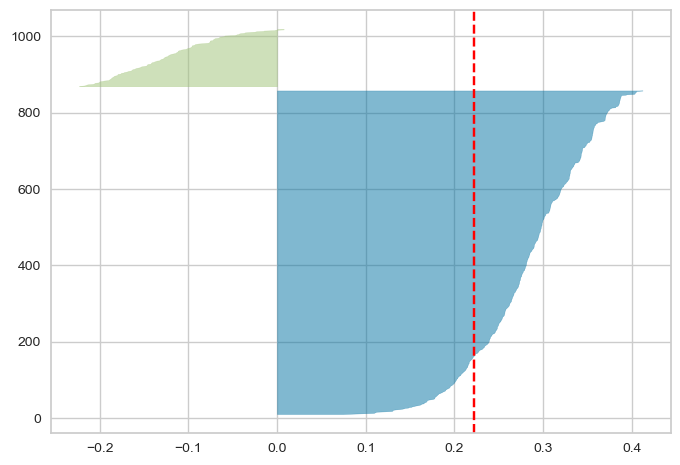

In [118]:
# kmeans-count
visualize_silhouette(bow.A,kmeans_count)

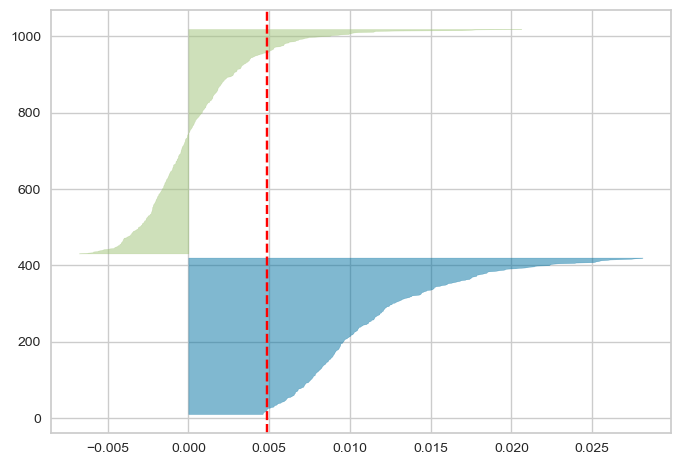

In [119]:
# kmeans-tfidf
visualize_silhouette(tfidf_val.A,kmeans_tfidf)

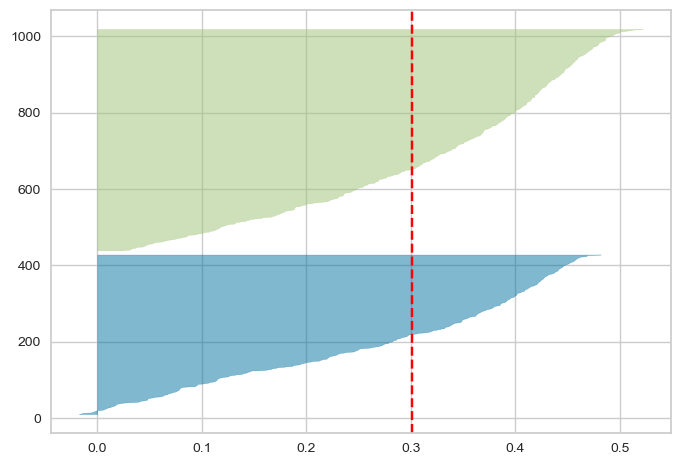

In [120]:
# kmeans-word2vec
visualize_silhouette(x_emb,kmeans_word2vec)

In [ ]:
data

# Adding label to original data to convert unlabeld to label data

In [122]:
data["label"]=word2vec_pred

C:\Users\DELL\AppData\Local\Temp\ipykernel_14568\3860145465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label"]=word2vec_pred


In [123]:
data

stars                                  translated_review  label
0        3  Very good aesthetics but eye because they are ...      1
1        2  What I did not like anything is shipping charg...      0
2        5  I like this vigilabebes, the image quality is ...      1
3        4  The truth is not bad is that it works quite we...      0
4        2  Received in a timely manner, quality is bad or...      1
..     ...                                                ...    ...
995      5  Very good quality and meets exactly what is in...      0
996      5  The eyebrow is very good and very comfortable,...      1
997      1  A little misleading imply that you buy a box t...      1
998      5  Unthinkable get some covers at that price.They...      0
999      2  The fryer is small.ration for 2 people.You spe...      1

[1000 rows x 3 columns]

In [124]:
label=data.to_csv(r"C:\Users\DELL\Desktop\review_kmeans.csv")

In [125]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\review_kmeans.csv")

In [126]:
data

Unnamed: 0  stars                                  translated_review  \
0             0      3  Very good aesthetics but eye because they are ...   
1             1      2  What I did not like anything is shipping charg...   
2             2      5  I like this vigilabebes, the image quality is ...   
3             3      4  The truth is not bad is that it works quite we...   
4             4      2  Received in a timely manner, quality is bad or...   
..          ...    ...                                                ...   
995         995      5  Very good quality and meets exactly what is in...   
996         996      5  The eyebrow is very good and very comfortable,...   
997         997      1  A little misleading imply that you buy a box t...   
998         998      5  Unthinkable get some covers at that price.They...   
999         999      2  The fryer is small.ration for 2 people.You spe...   

     label  
0        1  
1        0  
2        1  
3        0  
4        1  
..     ...  
995      0  
996      1  
997      1  
998      0  
999      1  

[1000 rows x 4 columns]

In [127]:
x_emb

array([[-0.01259964,  0.00929798,  0.00479417, ..., -0.01121657,
        -0.00095832,  0.0019705 ],
       [-0.00376356,  0.01149768,  0.00737794, ..., -0.01908184,
         0.00406261, -0.000139  ],
       [-0.00469308,  0.0071627 ,  0.00217495, ..., -0.01217976,
         0.00291219, -0.00106337],
       ...,
       [-0.00703189,  0.00901501,  0.00229528, ..., -0.009636  ,
         0.00407919,  0.00143107],
       [-0.00760128,  0.00817003,  0.00360285, ..., -0.01415156,
         0.00492214, -0.0005257 ],
       [-0.00308353,  0.00603362,  0.00255653, ..., -0.00835568,
         0.00322793,  0.00163699]], dtype=float32)

In [128]:
y=data.label.values
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

# Modelling

In [129]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_emb, y, test_size=0.2, random_state=42)


In [130]:
log = LogisticRegression()
log.fit(X_train, y_train)


LogisticRegression()

In [131]:
y_pred = log.predict(X_test)


In [132]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0], dtype=int64)

In [133]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.645
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        87
           1       0.61      1.00      0.76       113

    accuracy                           0.65       200
   macro avg       0.81      0.59      0.54       200
weighted avg       0.78      0.65      0.57       200



In [135]:
y_pred = log.predict(X_train)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [136]:
y_train

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [137]:
accuracy = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.66625
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33       332
           1       0.64      1.00      0.78       468

    accuracy                           0.67       800
   macro avg       0.82      0.60      0.55       800
weighted avg       0.79      0.67      0.59       800



#### KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_emb, y, test_size=0.2, random_state=42)
# Create KNN model
k = 5  # Number of neighbors, can be tuned
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        87
           1       0.95      1.00      0.97       113

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [139]:
X_test

array([[-0.00324163,  0.00652076,  0.00740983, ..., -0.01085653,
         0.00209366, -0.00334805],
       [-0.01081394,  0.0153016 ,  0.00572911, ..., -0.02124759,
         0.00791064, -0.00236655],
       [-0.00963297,  0.00907702, -0.00143373, ..., -0.01796846,
         0.00748172, -0.00687995],
       ...,
       [-0.00559462,  0.00985338,  0.00277119, ..., -0.01134156,
         0.00248957, -0.00104824],
       [-0.00224627,  0.00380748, -0.00222123, ..., -0.00717152,
         0.00283232, -0.00132728],
       [-0.00119719,  0.01265253, -0.00249755, ..., -0.01074409,
         0.00968379, -0.00896703]], dtype=float32)

#### Naive bayes

In [ ]:
#probability===conditionla probability
#spam.tsv==>emails
#op     Ip

In [140]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [141]:
# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        87
           1       0.98      1.00      0.99       113

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [1]:
(87/200)*100

43.5

In [2]:
(113/200)*100

56.49999999999999

# Testing with new review

In [142]:
s="Not good"
#0

In [143]:
s=s.lower()
s=s.split()

In [144]:
s

['not', 'good']

In [145]:
input=vectorizer([s],model)
input

[array([-0.02092947,  0.02446836,  0.01107362,  0.01154839,  0.01063675,
        -0.05488637,  0.01494614,  0.07358254, -0.03165747, -0.01834583,
        -0.01258903, -0.05328442, -0.01164863,  0.02470269,  0.0127102 ,
        -0.01769236,  0.00973886, -0.02875326, -0.00909521, -0.07086751,
         0.02253583,  0.01923598,  0.02774406, -0.02084254,  0.00166746,
         0.00668075, -0.0285602 , -0.01637639, -0.03104061,  0.01488716,
         0.03571562, -0.00306443,  0.01392815, -0.02705965, -0.00801103,
         0.03413609,  0.01036819, -0.02951903, -0.00714714, -0.05808007,
        -0.00095445, -0.03070436, -0.0223391 , -0.0023149 ,  0.02329727,
         0.00118572, -0.0173506 , -0.00149141,  0.02073641,  0.02376975,
         0.01153858, -0.02633882, -0.01659856,  0.0085798 , -0.01115534,
         0.01882385,  0.02535075, -0.00380057, -0.03335924,  0.0286172 ,
         0.00205423,  0.00351355, -0.01406224, -0.01268141, -0.03273786,
         0.03041352,  0.01337419,  0.02259306, -0.0

In [146]:
y_pred = nb.predict(input)

In [147]:
y_pred

array([0], dtype=int64)

#### Test2

In [148]:
# Provided review
review1 = """I'm very disappointed with this smartphone. The battery drains quickly, even with minimal use. The camera quality is subpar and it struggles in low light. Additionally, the phone heats up during simple tasks. I've had it for a month and it's already showing signs of lagging. I do not recommend this product."""

# Create a DataFrame
data = {'Review': [review1]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                                              Review
0  I'm very disappointed with this smartphone. Th...


In [149]:
len(df.Review[0].split())

52

In [150]:
clean_text = df.Review.apply(remove_lines)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(accented_char)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)

In [151]:
clean_text

0    [disappoint, smartphone, The, battery, drain, ...
Name: Review, dtype: object

In [152]:
len(clean_text[0])

29

In [153]:
input=vectorizer(clean_text,model)
input

[array([-0.0063445 ,  0.00914256,  0.00294072,  0.00229276,  0.00364441,
        -0.01682949,  0.00509694,  0.02510012, -0.01034684, -0.00509555,
        -0.00789806, -0.01665129, -0.00150752,  0.00547037,  0.00526165,
        -0.00889819,  0.00263709, -0.01321866, -0.00058377, -0.02414768,
         0.00746635,  0.00588398,  0.00984088, -0.00645169, -0.00238951,
         0.00298712, -0.0120351 , -0.00622153, -0.01192756,  0.0061328 ,
         0.01155739,  0.00014641,  0.0039787 , -0.00944259, -0.00537681,
         0.01199142,  0.00165772, -0.01263903, -0.00641428, -0.02298245,
         0.00141898, -0.01030318, -0.00572679,  0.00194842,  0.01023114,
        -0.00160124, -0.00594761, -0.00444778,  0.00738459,  0.00658852,
         0.00379906, -0.00907314, -0.00528388,  0.00172977, -0.00438473,
         0.00617337,  0.00562136,  0.00086376, -0.0134836 ,  0.00698629,
         0.00218763,  0.0011203 , -0.00191837, -0.00282935, -0.01298429,
         0.00909375,  0.00324362,  0.00739944, -0.0

In [154]:
y_pred = nb.predict(input)
y_pred

array([0], dtype=int64)

### Test3

In [155]:
reveiw2="""This smartphone is fantastic! It has a great camera, fast performance, and a long-lasting battery. I love using it every day"""

In [156]:
# Create a DataFrame
data = {'Review': [reveiw2]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                                              Review
0  This smartphone is fantastic! It has a great c...


In [157]:
clean_text = df.Review.apply(remove_lines)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(accented_char)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)

input=vectorizer(clean_text,model)
input


[array([-4.17627161e-03,  7.45573035e-03,  1.39833183e-03,  7.24003301e-04,
         5.23710158e-03, -1.20311854e-02,  4.76268213e-03,  2.14594044e-02,
        -6.95364783e-03, -3.06102418e-04, -7.04732630e-03, -1.60159133e-02,
        -3.46476026e-03,  6.90296805e-03,  2.39301985e-03, -8.49976577e-03,
         3.30378721e-03, -1.05595887e-02, -4.15632594e-03, -2.32441872e-02,
         6.62539667e-03,  5.97338658e-03,  7.98980333e-03, -4.74543357e-03,
        -1.09390600e-03,  4.08174191e-03, -9.72730946e-03, -6.16540294e-03,
        -1.27285849e-02,  6.20137015e-03,  1.31866802e-02,  2.91470991e-04,
         5.05842781e-03, -7.60959694e-03, -7.18895067e-03,  1.12397959e-02,
         1.29474443e-03, -1.17719946e-02, -4.45799809e-03, -2.01460458e-02,
        -1.46405364e-03, -1.11474609e-02, -5.86657273e-03, -4.17071453e-04,
         9.00925975e-03, -2.70685786e-03, -5.21509675e-03, -2.90665543e-03,
         6.89056050e-03,  8.73444229e-03,  7.27638020e-04, -8.43647309e-03,
        -5.8

In [158]:
clean_text

0    [This, smartphone, fantastic, great, camera, f...
Name: Review, dtype: object

In [159]:
y_pred = nb.predict(input)
y_pred

array([1], dtype=int64)

In [160]:
reveiw3="The product works as expected and the quality is outstanding. Worth every penny!"

In [161]:
# Create a DataFrame
data = {'Review': [reveiw3]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                                              Review
0  The product works as expected and the quality ...


In [162]:
clean_text = df.Review.apply(remove_lines)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(accented_char)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)

input=vectorizer(clean_text,model)
clean_text

0    [The, product, work, expect, quality, outstand...
Name: Review, dtype: object

In [163]:
y_pred = nb.predict(input)
y_pred

array([0], dtype=int64)

In [164]:
reveiw4="What I did not like anything is shipping charge, more than 10% of the price of the product, fatal."
# Create a DataFrame
data = {'Review': [reveiw4]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                                              Review
0  What I did not like anything is shipping charg...


In [165]:
clean_text = df.Review.apply(remove_lines)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(accented_char)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)

input=vectorizer(clean_text,model)
clean_text

0    [What, not, like, anything, ship, charge, pric...
Name: Review, dtype: object

In [166]:
y_pred = nb.predict(input)
y_pred

array([0], dtype=int64)

In [167]:
reveiw4="Strange Smell:It had a weird chemical smell that didn’t go away even after washing."
# Create a DataFrame
data = {'Review': [reveiw4]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
clean_text = df.Review.apply(remove_lines)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(accented_char)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)

input=vectorizer(clean_text,model)
clean_text

                                              Review
0  Strange Smell:It had a weird chemical smell th...


0    [Strange, Smell, weird, chemical, smell, not, ...
Name: Review, dtype: object

In [168]:
y_pred = nb.predict(input)
y_pred

array([0], dtype=int64)

In [169]:
reveiw4="Great value for money! Totally worth every penny."
# Create a DataFrame
data = {'Review': [reveiw4]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
clean_text = df.Review.apply(remove_lines)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(accented_char)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)

input=vectorizer(clean_text,model)
clean_text

                                              Review
0  Great value for money! Totally worth every penny.


0    [Great, value, money, Totally, worth, every, p...
Name: Review, dtype: object

In [170]:
y_pred = nb.predict(input)
y_pred

array([1], dtype=int64)

# Saving All Models

In [184]:
import pickle


# Save Word2Vec Model
with open("word2vec_model.pkl", "wb") as file:
    pickle.dump(model, file)  #dump===save
    # Save the function
with open("vectorizer_function.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Save KMeans Model
kmeans_model, y_pred = build_kmeans(2, x_emb)
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans_model, file)

# Save Naïve Bayes Model
with open("naive_bayes_model.pkl", "wb") as file:
    pickle.dump(nb, file)

print("All models saved successfully!")


All models saved successfully!


In [190]:

# Load the function
with open("vectorizer_function.pkl", "rb") as f:
    vectorizer3 = pickle.load(f)
    

In [192]:
reveiw4="Great value for money! Totally worth every penny."
# Create a DataFrame
data = {'Review': [reveiw4]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
clean_text = df.Review.apply(remove_lines)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(accented_char)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)
vectorizer3(clean_text,model)

                                              Review
0  Great value for money! Totally worth every penny.


[array([-9.45459469e-04,  7.30215944e-03,  6.02118531e-03,  4.55633830e-03,
        -3.30160069e-03, -1.22954827e-02, -1.71644133e-05,  1.85903851e-02,
        -7.35512003e-03, -3.24429059e-03, -2.95709539e-03, -1.31174996e-02,
        -2.09717266e-03,  3.05320765e-03, -1.86501711e-03, -3.48648243e-03,
         5.28160669e-03, -8.73677433e-03,  1.26404269e-03, -1.85368750e-02,
         2.11810973e-03,  4.51683952e-03,  1.29882200e-03, -5.76278195e-04,
        -7.04068225e-03,  3.74646997e-03, -5.74666075e-03, -4.81939409e-03,
        -9.55403224e-03,  2.28875014e-03,  1.17379585e-02,  2.20006728e-03,
         1.40156678e-03, -2.56622792e-04, -6.44374918e-03,  1.25842523e-02,
         3.71478149e-03, -1.01894075e-02, -3.64661147e-03, -1.44634014e-02,
         4.52833483e-03, -7.97989871e-03, -8.99255462e-03, -8.82444787e-04,
         2.58877315e-03,  1.72141823e-04, -3.03206267e-03,  1.50485476e-03,
         3.81990010e-03,  1.60628115e-05,  2.07179785e-03, -5.24466671e-03,
        -2.6